# Проект: Изучение закономерностей, определяющих успешность игр

## Описание проекта

Представим, что мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. На дворе декабрь 2016 год, и мы планируем провести рекламную кампанию на 2017-й. 

Наша задача — выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

В нашем распоряжении есть исторические данные из открытых источников: данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Описание данных

*  *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales —* продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации *ESRB*

*ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.

## План исследования

1. Проведём обзор данных. Откроем файл и изучим общую информацию.

2. Подготовим данные:
    * заменим названия столбцов;
    * преобразуем данные в нужные типы: опишем в каких столбцах произведём замену и почему;
    * обработаем пропуски при необходимости: 
        * заполним пропуски и объясним почему заполнили определённым образом или почему не стали этого делать;
        * опишем причины, которые могли привести к пропускам;
    * посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

3. Проведём исследовательский анализ:
    * посмотрим, сколько игр выпускалось в разные годы;
    * посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами;
    * определим актуальный период продаж для последующего анализа;
    * выберем несколько потенциально прибыльных платформ;
    * изучим глобальные продажи в разбивке по платформам;
    * посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
    * соотнесём выводы с продажами игр на других платформах;
    * изучим жанры игр в разрезе с продажами.
    
4. Составим портрет пользователя каждого региона (*NA, EU, JP*):
    * определим для пользователя каждого региона самые популярные платформы. Опишем различия в долях продаж;
    * определим для пользователя каждого региона самые популярные жанры. Поясним разницу.
    * посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
5. Проверим гипотезы:
    * средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;
    * средние пользовательские рейтинги жанров *Action* и *Sports* разные.
    
6. Напишем общий вывод.

## Предварительные настройки

In [1]:
# загружаем необходимые библиотеки для работы с данными:
import pandas as pd

# загружаем необходимые бибилиотеки для работы с пропусками
import missingno as msno

# загружаем необходимые библиотеки для работы графиками:
import matplotlib.pyplot as plt

# загружаем необходимые библиотеки для проведения стат. тестов:
from scipy import stats as st

# загружаем бибилиотеки для работы с предупреждениями
import warnings

In [2]:
# производим необходимые настройки warnings:
warnings.filterwarnings('ignore')

# производим необходимые настройки pandas:
pd.set_option('display.max_columns', None)

# 1. Обзор данных

Проведём поверхностное исследование полученных данных. Откроем файл, проверим как загружаются данные. Изучим структуру и общую информацию таблицы. Посмотрим, какие проблемы с данными есть на первый взгляд. В конце резуюмируем вывод. 

In [3]:
# загружаем файл с данными
data_games = pd.read_csv('games.csv')

In [4]:
# проверяем данные
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Данные загрузились без проблем. Таблица имеет следующую структуру: каждая строка это выпущенная игра, столбцы это параметры,  которые описывают эту игру. У каждой игры есть название, жанр, платформа, на которой она выпускалась, год выпуска и возрастной рейтинг. Также есть объём продаж по крупным регионам: Северная Америка, Европа, Япония. Объём продаж в остальных регионах определён как `Other_sales`. Каждая игра оценивалась как критиками, так и пользователями.

In [5]:
# выводим общую информацию о данных
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных наблюдается $16715$ разных игр. Имена столбцов начинаются с заглавных букв, что не соответствует хорошему стилю написания. Имеются пропуски, в некоторых параметрах достаточно значительные. Также наблюдается несоответствие типов данных с некоторыми значениями параметров, что заметно было ещё при выводе таблицы на экран.

In [6]:
# оформляем общую информацию о самих играх
print('---------------------------------------')
print('Количество наблюдаемых игр:', data_games.shape[0])
print('---------------------------------------')
print('Количество выпускаемых платформ:', data_games.Platform.nunique())
print('---------------------------------------')
print('Количество жанров:', data_games.Genre.nunique())
print('---------------------------------------')
print('Самый первый год выпуска:', int(data_games.Year_of_Release.min()))
print('---------------------------------------')
print('Последний наблюдаемый год выпуска:', int(data_games.Year_of_Release.max()))
print('---------------------------------------')

---------------------------------------
Количество наблюдаемых игр: 16715
---------------------------------------
Количество выпускаемых платформ: 31
---------------------------------------
Количество жанров: 12
---------------------------------------
Самый первый год выпуска: 1980
---------------------------------------
Последний наблюдаемый год выпуска: 2016
---------------------------------------


## Вывод

Мы провели первичный обзор данных. Файл загрузился без ошибок. Данные имеют табличную форму, где каждая строка это одна игра, столбцы это параметры, которые описывают данную игру. Всего наблюдается $16715$ разных игр, у которых есть *имя, жанр, выпускаемая платформа, год выпуска, возрастной рейтинг, оценки критиков и пользователей, объём продаж разных регионов*. Наблюдаемые игры выпускались с $1980$ по $2016$ год, на $31$-й разной платформе, в $12$-ти разных жанрах.   

В данных были обнаружены следующие проблемы:

* столбцы имеют имена, не соотвтетсвующие хорошему стилю написания;
* в некоторых параметрах есть значительное количество пропусков;
* некоторые значения имеют ошибочно определённый тип данных.

Прежде чем приступить к исследовательскому анализу, нам необходимо устранить выявленные проблемы. Чем мы и займёмся на следующем этапе. 

# 2. Подготовка данных

На этом этапе мы исправим обнаруженные проблемы. Переименуем имена столбцов. Преобразуем данные в нужные типы и объясним почему. По возможности обработаем пропуски и установим возможные причины их возникновения. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. 

## 2.1. Имена столбцов

Единственная проблема в именах это заглавные буквы. Приведём их к нижнему регистру.

In [7]:
# приводим имена столбцов к нижнему регистру
data_games.columns = data_games.columns.str.lower()
# проверяем результат
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Мы успешно переименовали имена столбцов согласно хорошему стилю написания.

## 2.2. Типы данных

Изучим типы данных, которые есть в датафрейме. Проверим, верно ли они определены.

In [8]:
# выводим все типы
data_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Значения ***имени, платформы, жанра***, а также ***рейтинга*** игры являются строковыми и **определены верно** — это тип данных `object`. ***Год выпуска*** явно **не должен быть вещественным**, потому что месячная детализация здесь не подразумевается. Иначе использовалась бы полная или частичная дата. Так или иначе, десятичная часть является избыточной, и не представляет никакой пользы. Также могут возникнуть трудности в работе с этим параметром из-за специфичной работы компьютера с вещественными числами. 

Сомнения вызывают типы у *объёмов продаж* и *оценок*. Если эти параметры выражены как непрерывные переменные или как дискретные (в частном случае), то они должны быть вещественными числами. Взглянем на некоторое количество значений этих столбцов.

In [9]:
# выводим несколько столбцов
data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].head(10)

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,41.36,28.96,3.77,8.45,76.0,8
1,29.08,3.58,6.81,0.77,NaN,NaN
2,15.68,12.76,3.79,3.29,82.0,8.3
3,15.61,10.93,3.28,2.95,80.0,8
4,11.27,8.89,10.22,1.00,NaN,NaN
5,23.20,2.26,4.22,0.58,NaN,NaN
6,11.28,9.14,6.50,2.88,89.0,8.5
7,13.96,9.18,2.93,2.84,58.0,6.6
8,14.44,6.94,4.70,2.24,87.0,8.4
9,26.93,0.63,0.28,0.47,NaN,NaN


Из описания к данным следует, что все ***объёмы продаж*** измеряются миллионами. Значит, тип данных для этих параметров **определён верно** — значения округлены до второй цифры, то есть десяток тысяч.

***Оценка пользователей*** представляет собой вещественное число с десятичным разрядом после точки. Это продиктовано описанием данных — *оценка пользователей* имеет максимум $10$ и, скорее всего, является средним значением всех оценок. Значит, наблюдаемые значения вполне оправданы, но **имеют ошибочный тип данных** `object`. Если мы оставим этот тип без изменений, то дальнейшем не сможем его использовать в каких-либо числовых манипуляциях. 

***Оценка критиков*** имеет максимальную оценку $100$, поэтому не подразумевает дробную часть. Также дробная часть не прослеживается в наблюдаемых значениях. Значит, **параметр имеет не свой тип данных**. Наличие дробной части является избыточным, и только усложняет восприятие. Также могут возникнуть трудности в работе с этим параметром из-за специфичной работы компьютера с вещественными числами.

Итак, обобщим полученную информацию:

* `name` – строковое значение, изменение не требуется; 
* `platform` – строковое значение, изменение не требуется;   
* `year_of_release` – требуется преобразовать в **целочисленный тип** или **дату и время**; 
* `genre` – строковое значение, изменение не требуется; 
* `na_sales` – вещественное значение, изменение не требуется;
* `eu_sales` – вещественное значение, изменение не требуется;
* `jp_sales` – вещественное значение, изменение не требуется;
* `other_sales` – вещественное значение, изменение не требуется;
* `critic_score` – требуется преобразовать в **целочисленный тип**; 
* `user_score` – требуется преобразовать в **вещественный тип**; 
* `rating` – строковое значение, изменение не требуется;

Попробуем преобразовать ошибочные типы данных:

In [10]:
print('---------------------------------------')

# пробуем преобразовать год выпуска в целочисленный тип
try:
    data_games.year_of_release = data_games.year_of_release.astype('Int64')
    print('"years_of_release" успешно преобразован')
except:
    print('"years_of_release" не удалось преобразовать')

print('---------------------------------------')    

# проюуем преобразовать оценку критиков в целочисленный тип
try:
    data_games.critic_score = data_games.critic_score.astype('Int64')
    print('"critic_score" успешно преобразован')
except:
    print('"critic_score" не удалось преобразовать')

print('---------------------------------------')

# пробуем преобразовать оценку пользователей в вещественный тип
try:
    data_games.user_score = data_games.user_score.astype('Float64')
    print('"user_score" успешно преобразован')
except:
    print('"user_score" не удалось преобразовать')
    
print('---------------------------------------')

---------------------------------------
"years_of_release" успешно преобразован
---------------------------------------
"critic_score" успешно преобразован
---------------------------------------
"user_score" не удалось преобразовать
---------------------------------------


In [11]:
# проверяем результат
data_games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score          object
rating              object
dtype: object

Мы преобразовали ошибочные типы данных и объяснили почему мы это сделали. Нам не удалось преобразовать один параметр — `user_score`, оценка пользователя. Скорее всего это произошло из-за наличия в столбце нечислового значения. Далее мы это исправим.

## 2.3. Пропуски

Изучиим пропуски более детально и опишем возможные причины их появления. Выберем более подходящую стратегию для заполнения пропусков и заполним их.

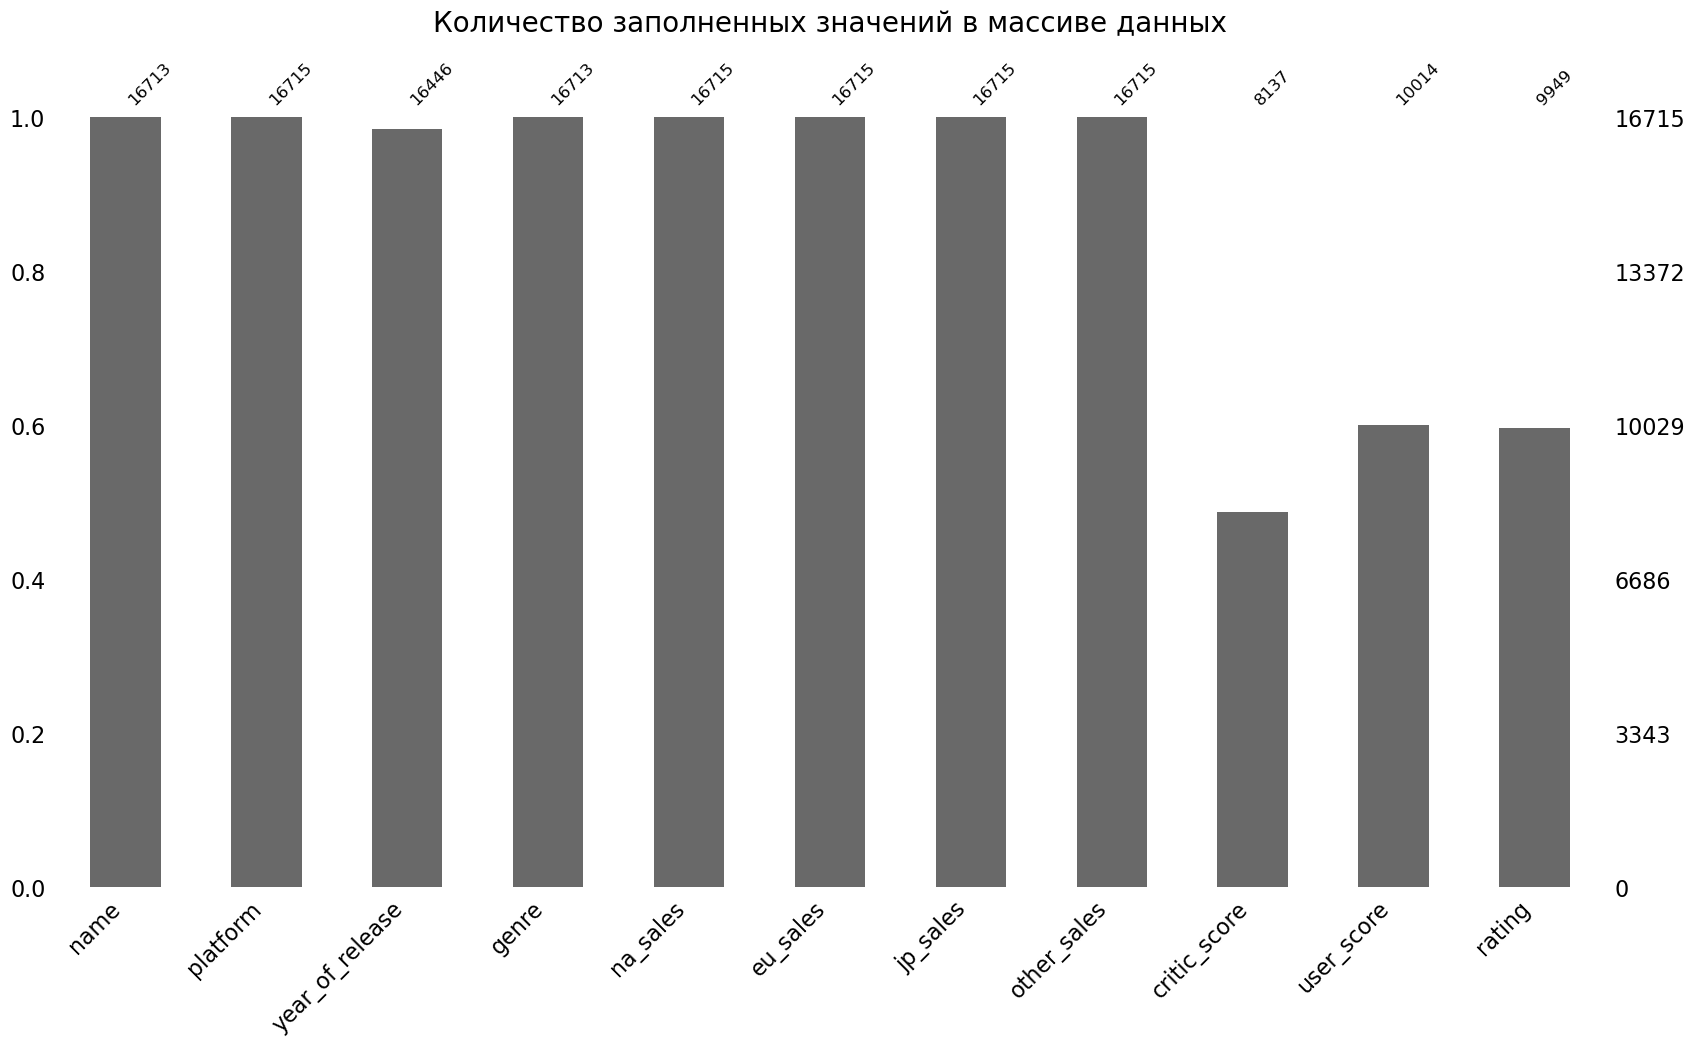

In [12]:
# визуализируем пропуски в данных
msno.bar(data_games, figsize=(20, 10))

# настраиваем график
plt.title('Количество заполненных значений в массиве данных', fontsize=20, pad=20)
plt.tick_params(labelsize=12)
plt.show()

In [13]:
# считаем количество пропусков
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [14]:
# выводим количество пропусков в процентах
pd.DataFrame(round((data_games.isna().mean()*100) \
                   .rename('percent_na'))) \
                   .style.background_gradient('coolwarm')

,percent_na
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Самое большое количество пропусков наблюдается у *оценок* и *возрастного рейтинга* — достигает половины от всех данных. Пропуски в остальных параметрах крайне незначительны. Рассмотрим более детально данные, имеющие в своих значениях пропуски.

### 2.3.1 Имена и жанры

In [15]:
# выводим данные с пропусками в имени
data_games[data_games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Пропуск в *имени* совпадает с пропуском в *жанре*. Вероятно, **один параметр зависит от другого**: нет *имени* – нет и *жанра*. В таком случае, **пропуск в *имени* выглядит случайным**. Посмотрим на пропуски в *годе выпуска*.

In [16]:
# выводим данные с пропусками в годе выпуска
data_games[data_games.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


**Пропуски в *годе выпуска* также выглядят случайными**: они не зависят ни от одного из присутствующих параметров. Проверим закономерность пропусков внутри столбца с помощью матрицы пропущенных значений, а зависимость от других пропусков — матрицей корреляций.

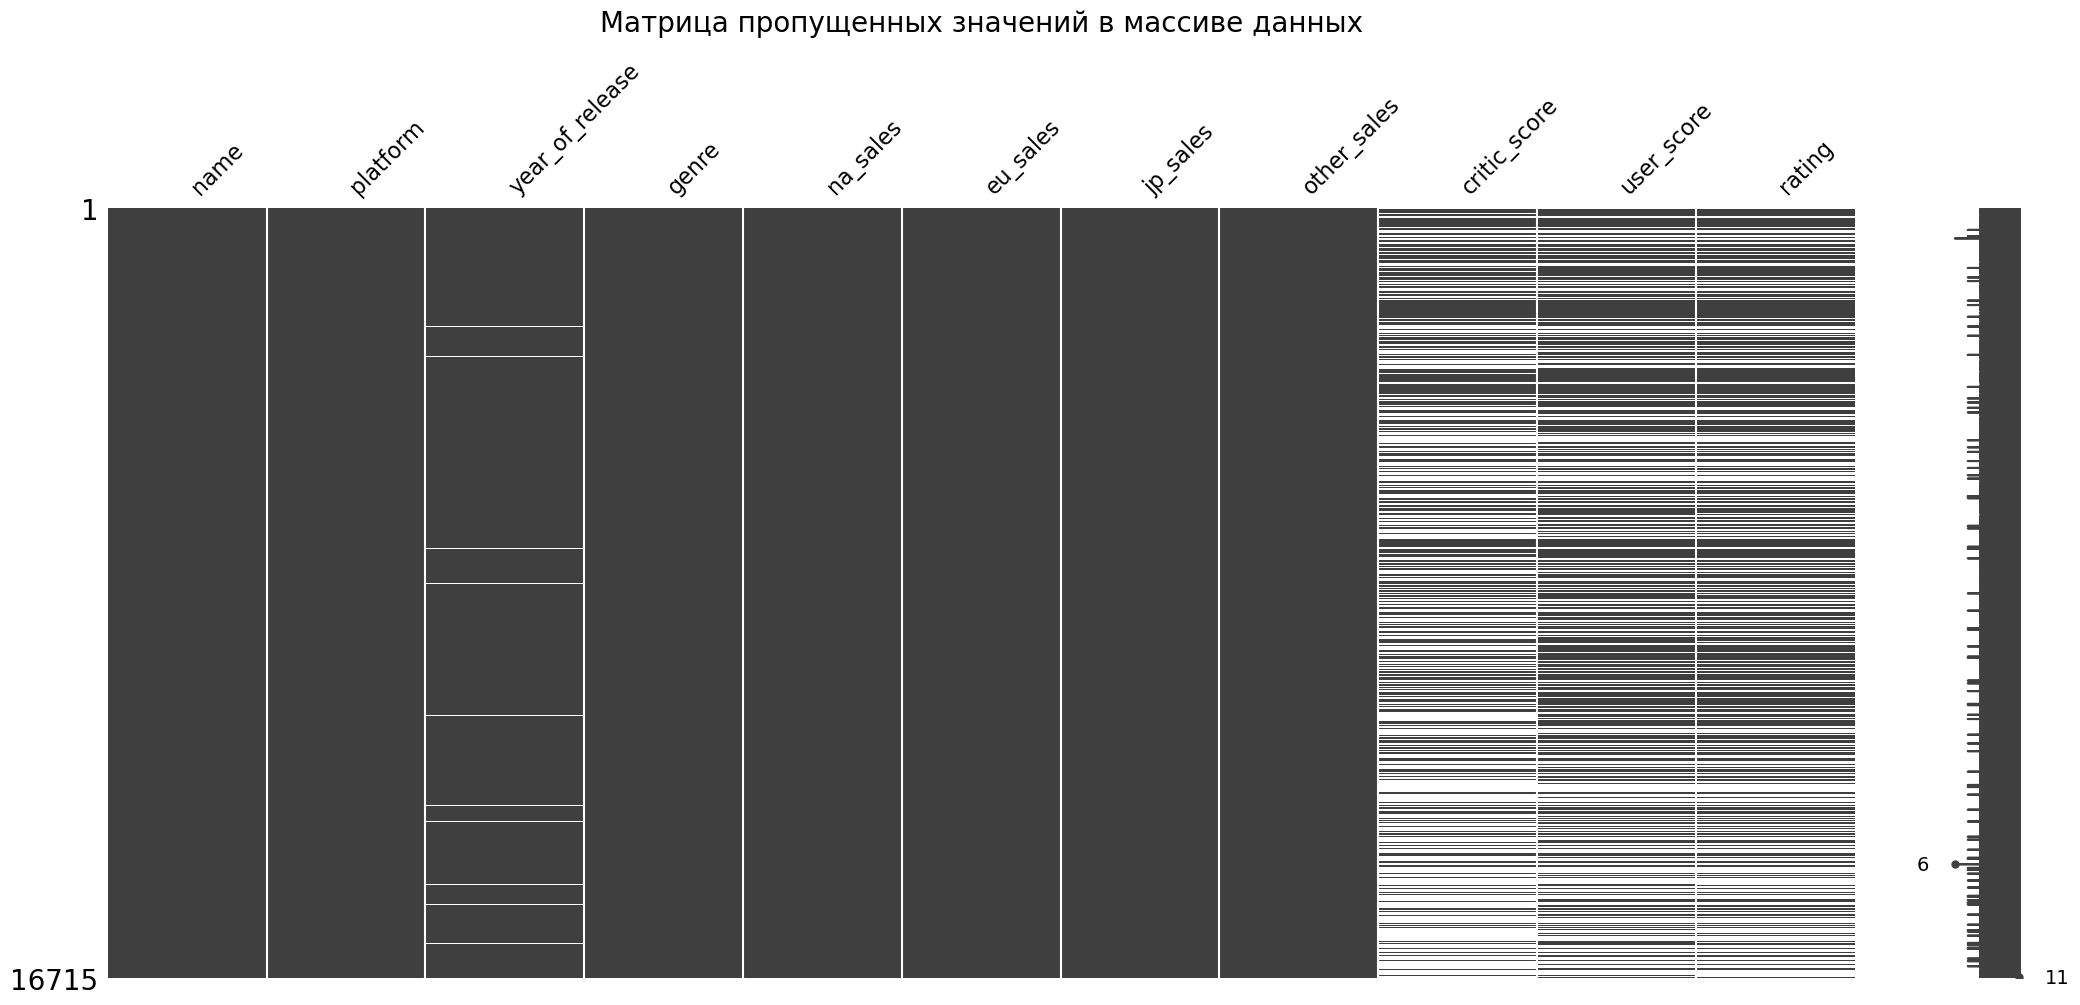

In [17]:
# строим матрицу пропущенных значений
msno.matrix(data_games)

# настраиваем график
plt.title('Матрица пропущенных значений в массиве данных', fontsize=20, pad=20);

Распределение пропущенных значений в данных подтверждает их случайность. Закономерностью были бы пропуски, например, только в первой половине наблюдений. У нас же никаких **паттернов не наблюдается**.

In [18]:
# строим матрицу корреляций пропусков
data_games[['year_of_release', 'critic_score', 'user_score', 'rating']].isna().corr()

,year_of_release,critic_score,user_score,rating
year_of_release,1.000000,-0.021924,-0.013428,-0.020232
critic_score,-0.021924,1.000000,0.787438,0.782945
user_score,-0.013428,0.787438,1.000000,0.974292
rating,-0.020232,0.782945,0.974292,1.000000


**Зависимость пропусков в *годе выпуска* с другими пропусками нулевая**. Цифры и график говорят нам о том, что пропуски в *годе выпуска* игр действительно случайная. 

Так как процент пропусков в *имени* и *годе выпуска* незначительный, то мы не будет тратить время на поиски значений для их заполнения, а просто удалим эти наблюдения. Это не должно повлиять на дальнейшее исследование.

In [19]:
# удаляем пропуски в требуемых столбцах
data_games.dropna(subset=['name', 'platform', 'year_of_release'], inplace=True)

# проверяем результат
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Мы удалили пропуски в *имени* и *жанре* игр.

### 2.3.2. Возрастной рейтинг

Теперь рассмотрим пропуски в *возрастном рейтинге*. Из описания данных известно, что *возрастной рейтинг* игры назначает ассоциация ESRB, которая была основана в $1994$ году. Она имеет следующий список категорий рейтинга игр:

* *EC (Early childhood)* — для детей младшего возраста;
* *E (Everyone)* — Для всех. Первоначально рейтинг именовался как *K-A (Kids to Adults)*;
* *E10+ (Everyone 10 and older)* — Для всех от 10 лет и старше. Рейтинг был принят ESRB 2 марта 2005 года;
* *T (Teen)* — Подросткам. Игра подходит для лиц от 13 лет;
* *M (Mature)* — Для взрослых. Материалы игры не подходят для лиц младше 17 лет;
* *AO (Adults Only 18+)* — Только для взрослых. Содержание игры только для взрослых старше 18 лет;
* *RP (Rating Pending)* — Рейтинг ожидается. Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный рейтинг используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу;
* *RP 17+ (Rating Pending)* — Рейтинг ожидается, примерно 17+. Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу *M*. Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.

Так как ассоциация была основана в $1994$ году, то **игры, выпущенные ранне, могут быть без рейтинга**. В таком случае наличие пропуска в наблюдении будет неслучайным. Посчитаем количество игр, подходящих под это условие, и количество игр, выпущенных ранее, но имеющих рейтинг.

In [20]:
# делаем срез игр, выпущенных до 1994 года и имеющих пропуски в рейтинге
data_games[data_games.rating.isna()].query('year_of_release < 1994')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,<NA>,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,<NA>,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992,Platform,0.00,0.00,0.04,0.00,<NA>,NaN,NaN
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,<NA>,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,<NA>,NaN,NaN


In [21]:
# делаем срез игр, выпущенных до 1994 года и не имеющих пропуски в рейтинге
data_games[data_games.rating.notna()].query('year_of_release < 1994')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2612,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,<NA>,NaN,T
14470,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59,5.8,T
14610,Doom,PC,1992,Shooter,0.02,0.00,0.0,0.00,85,8.2,M
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64,2.2,E10+


До $1994$ года было выпущено $365$ игр. Из них только четыре имеют *рейтинг*. Это можно объяснить переизданием игры, так как платформа у всех четырёх – *PC*. Игру переиздали после $1994$ года, и она получила свой рейтинг. В этом случае год указывается на первое издание игры. Похоже, что наша догадка вполне вероятна, а это значит, что пропуски здесь оправданы и являются неслучайными.

Другие случаи пропуска можно объяснить несколькими причинами:
* игра не издавалась на территории Северной Америки. Так как география *ESBR* распространяется только на США и Канаду, то другие игры остаются без *рейтинга*;
* игра не направлялась в ассоциацию для получения *рейтинга*. Процедура сертификации является добровольной, но многие розничные продавцы отказываются реализовывать такие игры без *рейтинга*. Возможно, какие-то разработчики отказались выполнять условия сертификации, и оставили игру без рейтинга.

В любом случае, у нас нет источника для заполнения этих пропусков каким-либо характерным значением *рейтинга*. Поэтому нам остается только пометить эти наблюдения как «безрейтинговые», если мы хотим использовать их в дальнейшем исследовании.

### 2.3.3. Оценки

Рассматривая пропуски в *оценках* мы можем заметить одну закономерность: складывается впечатление, что пропуск в *рейтинге* является причиной пропуска в *оценках*. Немного выше мы строили матрицу пропущенных значений, на которой заметны пропуски сразу по трём столбцам. Проверим зависимость этих столбцов.  

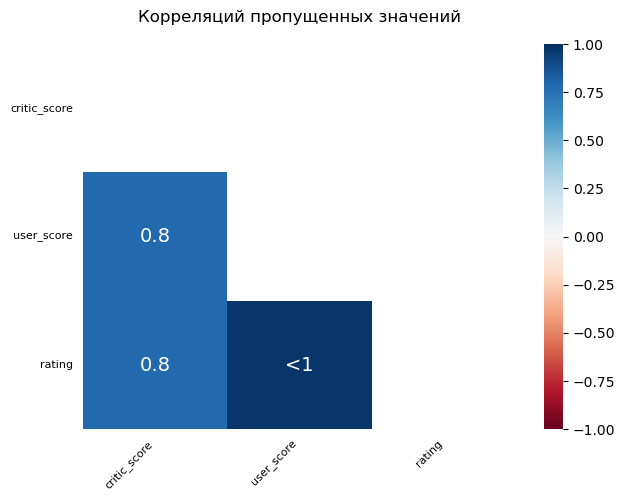

In [22]:
# строим тепловую карту корреляций пропущенных значений по трём столбцам
msno.heatmap(data_games[['critic_score', 'user_score', 'rating']], figsize=(7, 5))

# настраиваем график
plt.title('Корреляций пропущенных значений', fontsize=12, pad=16)
plt.tick_params(labelsize=8)
plt.show()

Цифры говорят о сильной взаимосвязи: **пропуски в *рейтинге* в подавляющем большинстве совпадают с пропусками в *оценках***. Данные могли собираться из разных открытых источников: *оценки* могла предоставить онлайн платформа, на которой отсутствуют игры без *рейтинга* (ужесточённая политика ограничения по возрасту). Также *оценки* в старых играх могут отсутствовать, потому что раньше игры не оценивались так масштабно, игровая индустрия только зарождалась.

Принимая во внимание эти выводы, можно заключить, что существуют такие наблюдения, в которых *оценки* отсутствуют по причине отсутствия *возрастного рейтинга*. Проверим данные, которые всё же имеют значения *оценок* при пропущенном *рейтинге*.

In [23]:
print('-------------------------------------------------------------')

# считаем количество игр без рейтинга и с оценками пользователей
print(
    'Количество игр без рейтинга с пользовательскими оценками:',
    data_games.loc[data_games.rating.isna(), 'user_score'].value_counts().sum()
)
print('-------------------------------------------------------------')

# считаем количество игр без рейтинга и с оценками критиков
print(
    'Количество игр без рейтинга с оценками критиков:',
    data_games.loc[data_games.rating.isna(), 'critic_score'].value_counts().sum()
)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Количество игр без рейтинга с пользовательскими оценками: 133
-------------------------------------------------------------
Количество игр без рейтинга с оценками критиков: 81
-------------------------------------------------------------


В данных есть $234$ наблюдения без *рейтинга*, но с *оценкой*. Это $2\%$ от всех данных, так что мы можем проигнорировать факт наличия таких наблюдений и оставить их без каких-либо изменений. **Заполнение всех пропусков в *оценках* характерными средними значениями (как глобально, так и по группам) будет некорректным**, потому что *оценка* зависит от качества игры и общего впечатления. Каждая игра является идивидуальным продуктом, и даже в одном жанре может иметь разные оценки. Одна и та же игра, портированная на разные платформы, также может иметь разные оценки из-за «удачности» портирования. Иначе говоря, ***оценка* имеет более сложные зависимости**, чем просто зависимость от *платформы*, *возрасного рейтинга* или *жанра*, и заполнение пропусков средним попросту размажет эти зависимости. В таком случае **пропуски в *оценках* лучше оставить неопределёнными**.   

Обратим внимание на уникальные значения *оценки пользователей*. В столбце имеется значение `tbd`. Их количество достигает $2376$ случаев. 

In [24]:
# выводим первые 10 самых частотных оценок
data_games.user_score.value_counts().head(10)

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
Name: count, dtype: int64

*tbd* или *to be determined* является термином-заполнителем, который широко используется в планировании мероприятий. В игровой индустрии подобное сокращение часто можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. 

Также эту аббревиатуру можно увидеть и в отношении уже вышедших игр, если у них готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено.

В случае *оценки пользователей* этот термин скорее применим как *to be discussed*, что значит «подлежит обсуждению». То есть для этих игр на момент сбора данных *оценка* не была доступной или только собиралась объявляться. В рамках нашего исследования **разумно заменить это значение на неопределённое.**   

In [25]:
# делаем срез данных по значению tdb в оценке
data_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


### 2.3.4. Обработка пропусков

Резюмируем полученную информацию:

* пропуски в `rating` заполняем зачением-заглушкой *«без рейтинга»*;
* пропуски в `critic_score` и `user_score` оставляем без изменений;
* значение *«tbd»* заменяем на `NaN`.

Также нам необходимо изменить тип данных в `user_score` на вещественный.

In [26]:
# заполняем пропуски в рейтинге
data_games.rating = data_games.rating.fillna('Без рейтинга')

# изменянем тип данных, заменяя некорректные значения на неорпеделённые
data_games.user_score = pd.to_numeric(data_games.user_score, errors='coerce')

# проверяем результат
print('Уникальные значения рейтинга:', data_games.rating.unique())
print('Тип данных оценки пользователей:', data_games.user_score.dtype)

Уникальные значения рейтинга: ['E' 'Без рейтинга' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Тип данных оценки пользователей: float64


Мы заменили пропуски в рейтинге значением-заглушкой *«без рейтинга»*, значение *«tbd»* неопределённым значением `NaN`. Преобразовали тип данных *оценки пользователей* в вешщественный. Пропуски в *оценке критиков* и *оценке пользователей* оставили без изменений. В уникальных значениях *рейтинга* присутствует неявный дубликат.

## 2.4. Дубликаты

В возрастном рейтинге ассоциации *ESBR* есть обозначение, которое со временем изменилось, но значение которого осталось прежним: E (Everyone) — Для всех. Первоначально рейтинг именовался как K-A (Kids to Adults). Изменим его значение на актуальное.  

In [27]:
# меняем одно значение на другое
data_games.rating.replace('K-A', 'E', inplace=True)

# проверяем результат
data_games.rating.unique()

array(['E', 'Без рейтинга', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

In [28]:
# считаем количество дубликатов
data_games.duplicated().sum()

0

Мы избавились от неявных дубликатов в *возрастном рейтинге*, которые обозначали один и тот же возраст, но имели разное значение в данных. Также мы проверили наличие явных дубликатов в данных. Их не оказалось.

## 2.5. Суммарные продажи

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. Эти данные пригодятся нам в дальнейшем исследовании.

In [29]:
# считаем общую сумму продаж по всем регионам 
data_games['total_sales'] = data_games.loc[:, ['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# проверяем результат
data_games.total_sales.head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

Суммарные продажи во всех регионах посчитаны и записаны в отдельный столбец. 

## Вывод

На этапе подготовки данных мы исправили многие обнаруженные проблемы в данных:
* Имена столбцов начинались с заглавных букв, что не соответствует хорошему стилю написания. Мы привели значения к строчному виду и перезаписали имена столбцов.
* Некоторые типы данных были ошибочно определены: 
    * *год выпуска* был определён как вещественный тип и имел десятичную часть. Она не обозначает месяц, поэтому является избыточной. Мы откинули её, преобразовав тип *года выпуска* в целочисленный;
    * *оценка критиков* была определена как вещественный тип и имела десятичную часть, которая является избыточной. *Оценка критиков* подразумевает диапазон от $0$ до $100$, и в десятичной части не нуждается. Мы откинули её, преобразовав тип *оценки критиков* в целочисленный;
    * *оценка пользователей* была определена как объектовый тип. Все численные значения были определены как строки из-за наличия строкового значения *«tbd»* в данных. Сначала требовалось обрабоать это значение, после чего мы изменили *оценку пользователей* на вещественный тип, так как она подразумевает диапазон оценок от $0$ до $10$ с десятичной частью.
* Некоторые параметры имеют пропуски в данных:
    * в *именах* и *жанрах* было всего два наблюдения со случайными пропусками. Их наличие никак не связано со значениями в других параметрах. Пропуск в *имени* напрямую влиял на пропуск в *жанре*. Причина появления этих пропусков, скорее всего, техническая, например сбой при сборе данных. Так как количество этих пропуском ничтожно мало, то мы их просто удалили;
    * в *годе выпуска* было $269$ пропусков. Их появление в столбце является полностью случайным, так как не было замечено каких-либо паттернов появления. Также эти пропуски не были связаны с пропусками в других параметрах. Возможная причина появления пропусков также техническая. Так как их количесто составляло $2\%$ от всех даннных, то мы удалили наблюдения с этими пропусками. Это не должно повлиять на дальнейшее исследование;
    * в *рейтинге* пропуски составляли $40\%$ от всех данных. Часть пропусков возникла из-за того, что рейтинговой системы не было до 1994 года. Подавляющая часть пропусков возникла по двум возможным причинам: игры, которые не издавались на территории Северной Америки, могли остаться без рейтинга; игры могли не направляться в ассоциацию. Чтобы в дальнейшем была возможность использовать эти наблюдения, мы заполнили пропуски значением-заглушкой *«Без рейтинга»*;
    * в *оценках пользователей и критиков* пропуски составляют $40\%$ и $50\%$ соответственно. Была обнаружена сильная связь между *оценками* и *рейтингом*: подаваляющее большинство пропусков в этих параметрах совпадало. Это значит, что существуют такие наблюдения, в которых *оценки* отсутствуют по причине отсутствия *возрастного рейтинга*. Такое могло произойти, если онлайн платформа, на которой происходила оценка, не предоставляет игры без *рейтинга*. Также *оценка* может отсутствовоать для старых игр, которые не переиздавались, потому что в то время оценивание игр не являлось такой важной метрикой бизнеса как сейчас. Мы не стали заполнять пропуски в *оценках* средними или характерными значениями, потому что это некорректно. *Оценка* игры в большей степени зависит от качества самой игры и удачной портированности, а не от *жанра* или *возрастного рейтинга*. По этой причине мы оставили пропуски в *оценках пользователей и критиков* неопределёнными.
* В *оценке пользователей* было обнаружено уникальное значение *«tbd»*, которое и стало причиной ошибки преобразования типа данных этого параметра. *«tbd»* значит, что оценка «подлежит обсуждению». То есть для этих игр на момент сбора данных *оценка* не была доступной или только собиралась объявляться. Мы заменили это значение на неопределённое.
* В *рейтинге* были обнаружены неявные дубликаты. Согласно справочной информации один из *рейтингов*, *E (для всех)*, изначально назывался как *K-A (для детей и взрослых)*. Поэтому в данных присутствовали наблюдения двух этих *рейтингов*. Мы заменили значение старого *рейтинга* на новый.
* После обработки всех обнаруженных проблем мы рассчитали и добавили в данные новый параметр — общая сумма продаж во всех регионах, `total_sales`.  

# 3. Исследовательсикй анализ

На этом этапе мы определим актуальный период рынка индустрии игр, данные которого помогут построить прогноз на будущий год. Выберем несколько потенциально прибыльных платформ и проанализируем глобальные продажи игр по платформам. Выясним, как влияют отзывы пользователей и критиков внутри одной из популярных платформы, и как это соотносится с продажами игр на других платформах. Изучим общее распределение игр по жанрам. 

## 3.1. Актуальный период для прогноза

Посмотрим, сколько игр выпускалось в разные годы. Возможно, есть периоды, которые не стоит учитывать.

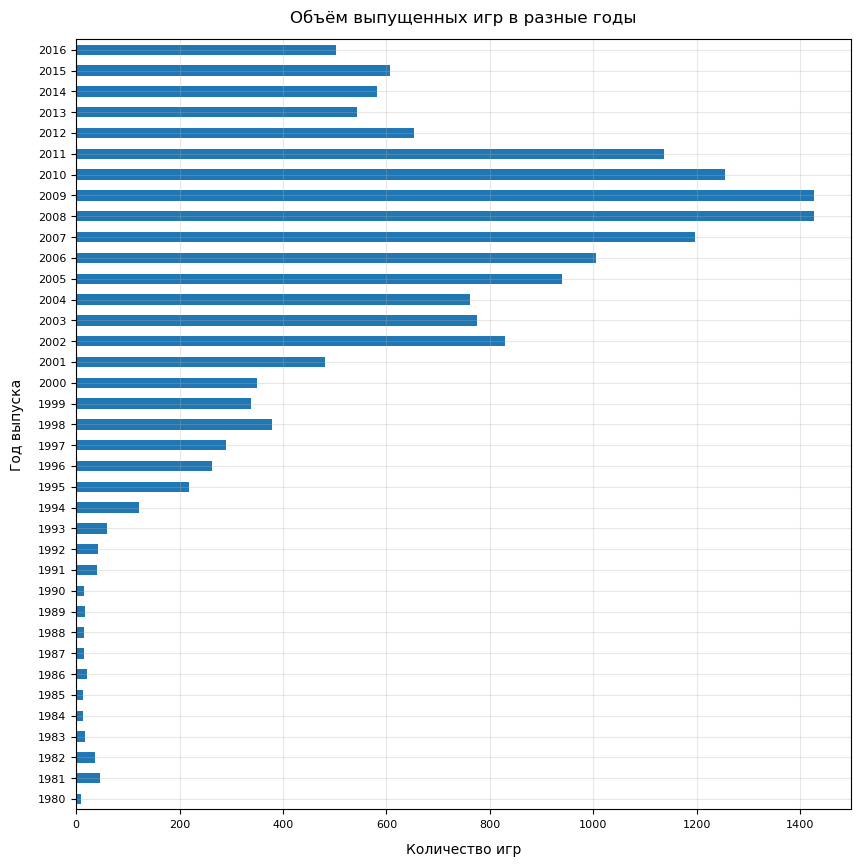

In [30]:
# группируем данные по годам и строим диаграмму
(
    data_games.groupby('year_of_release')['name']
    .count()
    .plot(kind='barh', figsize=(10, 10))
)

# настраиваем гарфик
plt.title('Объём выпущенных игр в разные годы', fontsize=12, pad=12)
plt.xlabel('Количество игр', fontsize=10, labelpad=10)
plt.ylabel('Год выпуска', fontsize=10, labelpad=10)
plt.tick_params(labelsize=8)
plt.grid(True, alpha=0.3)
plt.show()

В период до $1994$ года выпускалось очень мало игр. Отметку $100$ удалось достичь в $1994$ году, и далее по нарастающей. Пик был достигнут в $2008$ году, после чего объём выпуска игр пошёл на спад. Все периоды рассматривать не имеет смысла, так как со временем старые технологии заменяются новыми.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Так мы сможем определить характерный срок, когда появляются новые и исчезают старые платформы.

In [31]:
# выбираем топ 10 платформ по продажам 
top_ten_platforms = (
    # группируем данные по платформам и суммируем продажи
    data_games.pivot_table(
        index='platform', 
        values='total_sales', 
        aggfunc='sum')
    # сортируем по убыванию
    .sort_values(by='total_sales', ascending=False)
    # выбираем первые 10 строк    
    .head(10)
)

# проверяем результат
top_ten_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


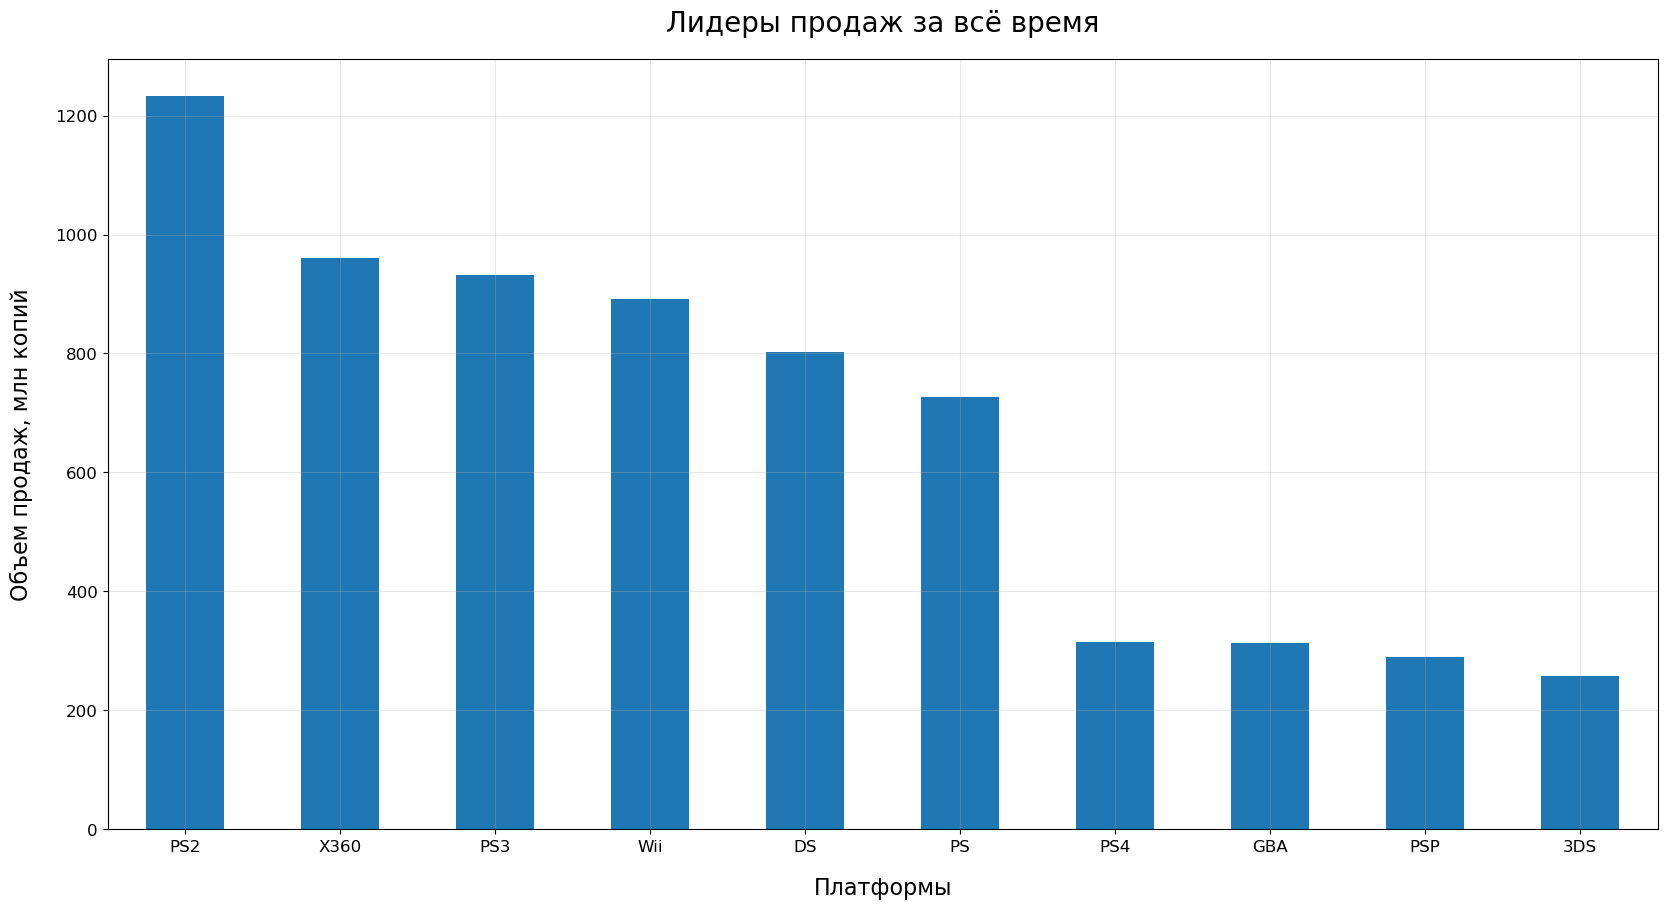

In [32]:
# строим график распределения топ 10 платформ
top_ten_platforms.plot(
    kind='bar', 
    figsize=(20, 10),
    rot=False,
    legend=None
)
# настраиваем гарфик
plt.title('Лидеры продаж за всё время', fontsize=20, pad=20)
plt.xlabel('Платформы', fontsize=16, labelpad=16)
plt.ylabel('Объем продаж, млн копий', fontsize=16, labelpad=16)
plt.tick_params(labelsize=12)
plt.grid(True, alpha=0.3)
plt.show()

**Лидером суммарных продаж за всё время является *PS2***, более 1 миллиарда и 200 миллионов проданых копий игр. Впечатлаяет. Чуть меньше миллиарда у *X360*. Остальные платформы также не отстают, плавно держа дистанцию. Примечательно, что есть платформы, у которых становится резко меньше продаж. Одно из двух: либо лпатформа ещё не набрала «свой» объём продаж, либо никогда уже не наберёт. Посмотрим на объём продаж популярных платформ в динамике. 

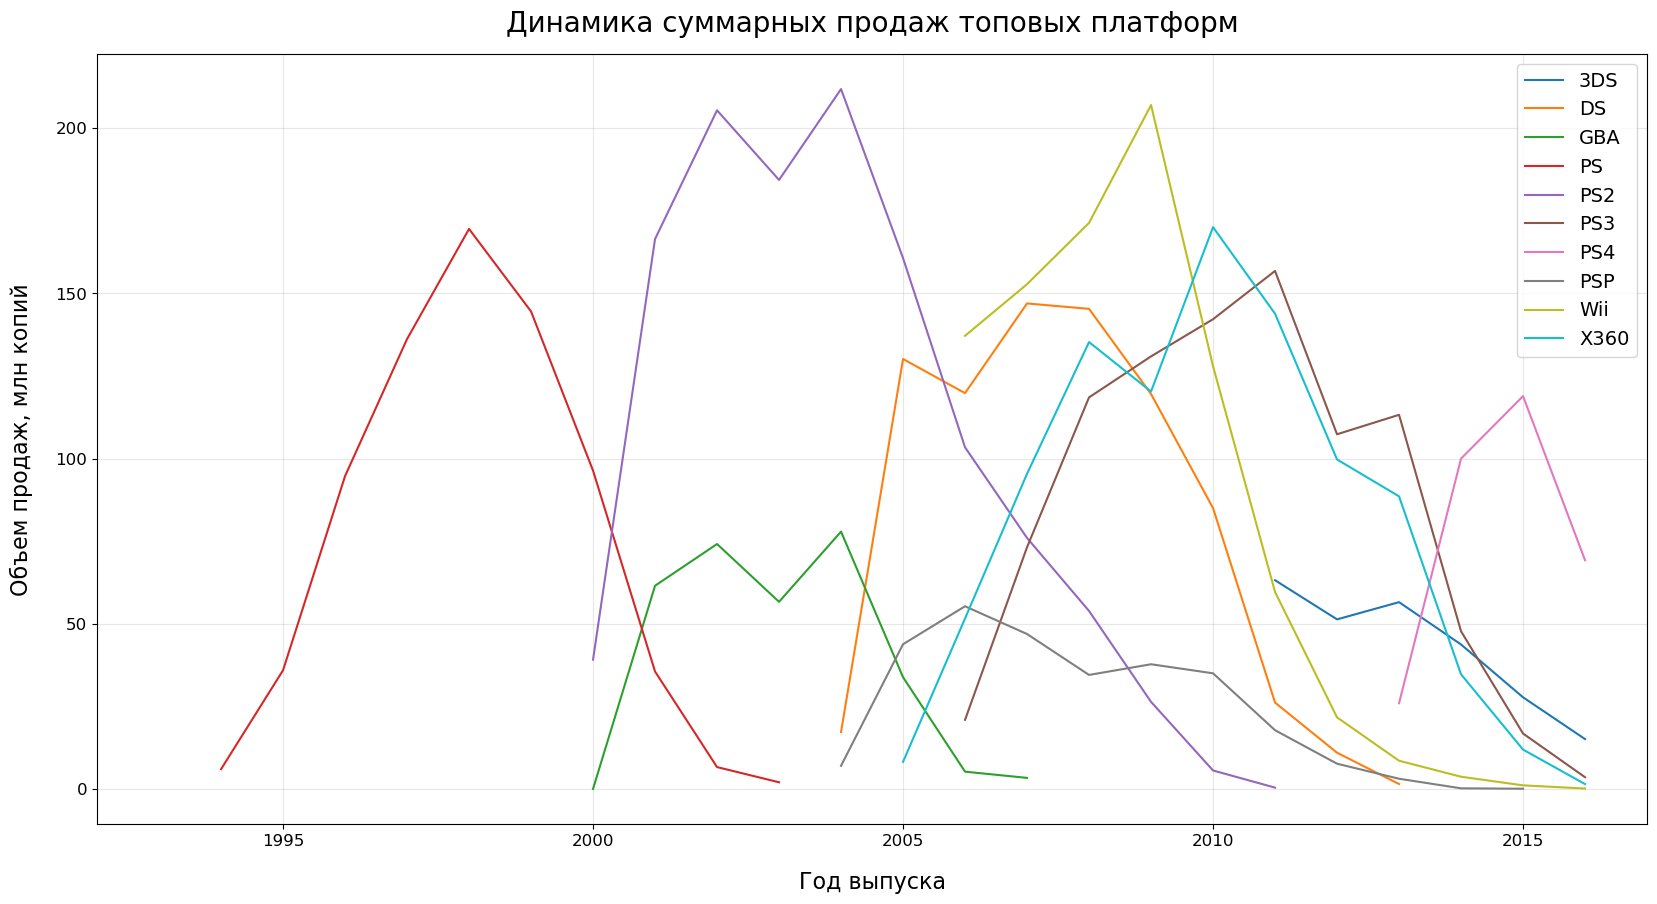

In [33]:
(
    # делаем срез данных по топ 10 платформ по продажам
    data_games.query('platform in @top_ten_platforms.index')
        # создаём сводную таблицу суммарных продаж по годам и платформам 
        .pivot_table(
            index='year_of_release', 
            columns='platform', 
            values='total_sales', 
            aggfunc='sum')
        # строим график по сводной таблице
        .plot(xlim=(1992, 2017), figsize=(20, 10))
)

# настраиваем график
plt.title('Динамика суммарных продаж топовых платформ', fontsize=20, pad=16)
plt.xlabel('Год выпуска', fontsize=16, labelpad=16)
plt.ylabel('Объем продаж, млн копий', fontsize=16, labelpad=16)
plt.legend(fontsize=14)
plt.tick_params(labelsize=12)
plt.grid(True, alpha=0.3)
plt.show()

*GBA* и *PSP* дейстивтельно имели небольшие продажи, относительно лидеров рынка. *PS4* и *3DS* появились позже, так что о «полном» объёме их продаж судить рановато, кто знает как они покажут себя в будущем. Стоит отметить, что представленные платформы разделяются два вида: консольные и портативные. Так вот, портативные платформы из топовых (*GBA*, *PSP*, *3DS*) в прошлом не превышали суммарный объём продаж выше $80$ млн копий, в то время как консольные платформы достигали объёма в почти три раза больше. Исходя из этого можно сделать вывод, что **консольные платформы прибыльнее портативных.**

Тепреь проанализируем жизненный цикл имеющихся платформ.

In [34]:
# создаем цикл, который выводит период существования платформ
for name, data in data_games.query('year_of_release >= 1994').groupby('platform'):
    
    # инициализируем годы существования
    start_year = data.year_of_release.min()
    end_year = data.year_of_release.max()
    
    # пишем условие для платформы из топ 10
    if name in top_ten_platforms.index:
        # выводим на экран название платформы и годы существования
        print('---------------------------------------------------------------')
        print(f'Возраст платформы {name}: {end_year - start_year} | Просуществовала с {start_year} по {end_year} год')

print('---------------------------------------------------------------')

---------------------------------------------------------------
Возраст платформы 3DS: 5 | Просуществовала с 2011 по 2016 год
---------------------------------------------------------------
Возраст платформы DS: 9 | Просуществовала с 2004 по 2013 год
---------------------------------------------------------------
Возраст платформы GBA: 7 | Просуществовала с 2000 по 2007 год
---------------------------------------------------------------
Возраст платформы PS: 9 | Просуществовала с 1994 по 2003 год
---------------------------------------------------------------
Возраст платформы PS2: 11 | Просуществовала с 2000 по 2011 год
---------------------------------------------------------------
Возраст платформы PS3: 10 | Просуществовала с 2006 по 2016 год
---------------------------------------------------------------
Возраст платформы PS4: 3 | Просуществовала с 2013 по 2016 год
---------------------------------------------------------------
Возраст платформы PSP: 11 | Просуществовала с 2004 по 

Самая старая игровая платформа из популярных — *PS*. На рынке она была единственным лидером до $2000$ года. Затем появилась *PS2*, платформа нового поколения, пришедшая на замену старой. В это же время стартует другая платформа — *GBA*, портативная. Начиная с $2004$ года появление новых платформ ускорилось — за период с $2004$ по $2006$ годы появилось 5 новых платформ. Последние наблюдаемые поколения платформ появились спустя $5-7$ лет. С уверенностью можно сказать, что **популярные платформы существуют $10-11$ лет, а характерный срок, когда появляются новые и исчезают старые платформы — в среднем $5$ лет.**  

Учитывая тот факт, что игровая индустрия развивается динамично, а новые поколения платформ быстро устаревают, нам следует выбрать **актуальный период, который достаточно осветит новые тренды, и при этом не затронет старые, отжившие.** Нам подходит период с $2014$ по $2016$ год, потому что старые поколения платформ, такие как *DS, GBA, Wii, PS, PS2*, завершили свой жизненный цикл, а новые как раз набирают обороты (например, *PS4*). Так мы сможем проанализировать свежий рынок, при этом не затронув неактуальыне данные. 

In [35]:
# инициализируем переменную с актуальным периодом данных
actual_data = data_games.query('year_of_release >= 2014')

## 3.2. Лидеры продаж

Посмотрим какие платформы лидируют по продажам за актуальный период и в каком тренде находятся. Выберем несколько потенциально прибыльных платформ.

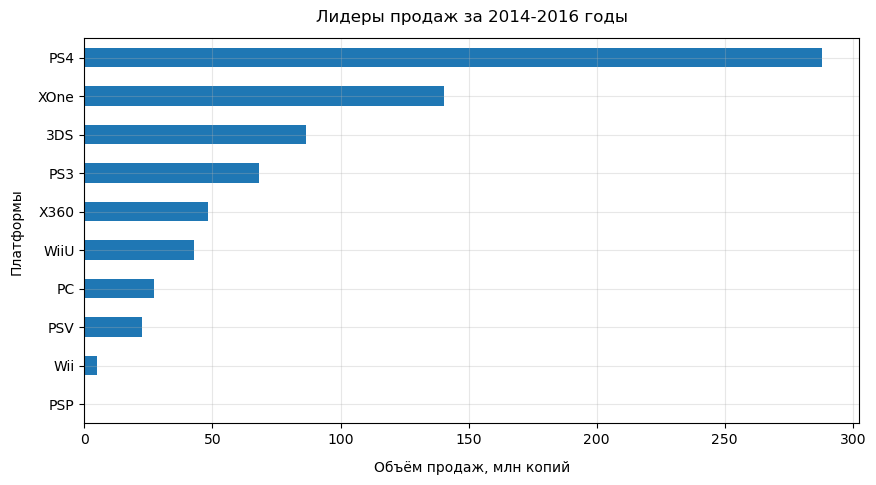

In [36]:
(
    # создаём сводную таблицу суммарным продажам актуального периода
    actual_data.pivot_table(
        index='platform', 
        values='total_sales', 
        aggfunc='sum')
    # сортируем данные по возрастанию
    .sort_values(by='total_sales')
    .plot(kind='barh', figsize=(10, 5), legend=False)
)
# настраиваем график
plt.title('Лидеры продаж за 2014-2016 годы', fontsize=12, pad=12)
plt.ylabel('Платформы', fontsize=10, labelpad=10)
plt.xlabel('Объём продаж, млн копий', fontsize=10, labelpad=10)
plt.grid(True, alpha=0.3)

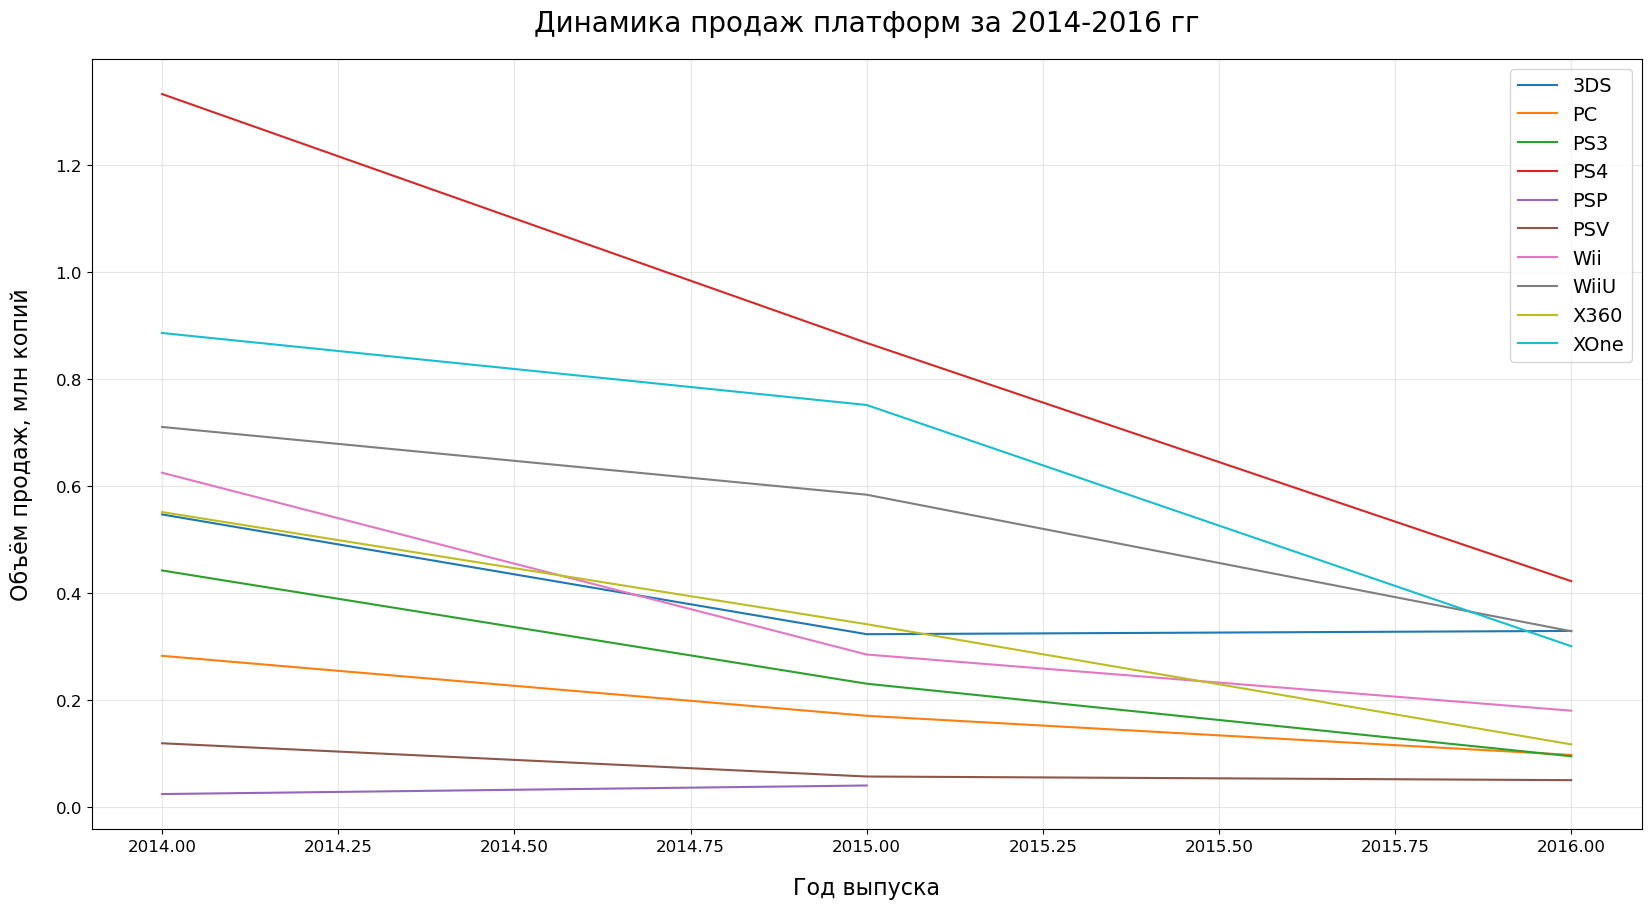

In [37]:
(
    # создаём сводную таблицу суммарным проодажам актуального периода
    actual_data.pivot_table(
        index='year_of_release', 
        columns='platform', 
        values='total_sales')
    # строим график по сводной таблице
    .plot(figsize=(20, 10))
)

# настраиваем график
plt.title('Динамика продаж платформ за 2014-2016 гг', fontsize=20, pad=20)
plt.xlabel('Год выпуска', fontsize=16, labelpad=16)
plt.ylabel('Объём продаж, млн копий', fontsize=16, labelpad=16)
plt.legend(fontsize=14)
plt.tick_params(labelsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Лидерами суммарных продаж за актуальный период являются *PS4, XOne*. со значительным перевесом в сторону *PS4*. В динамике продаж все платформы падают. К $2016$ году лидеры сократились вдвое, позиции *XOne*, *3DS* и *WiiU* практически сравнялись. Это случилось потому что c $2015$ года *XOne* стал больше терять в объемах продаж, а *3DS* сменил направление тренда. В лидерах остаётся *PS4*. Теперь взглянем на размах продаж игр в разбивке по платформам, чтобы понять как распределяются объёмы.

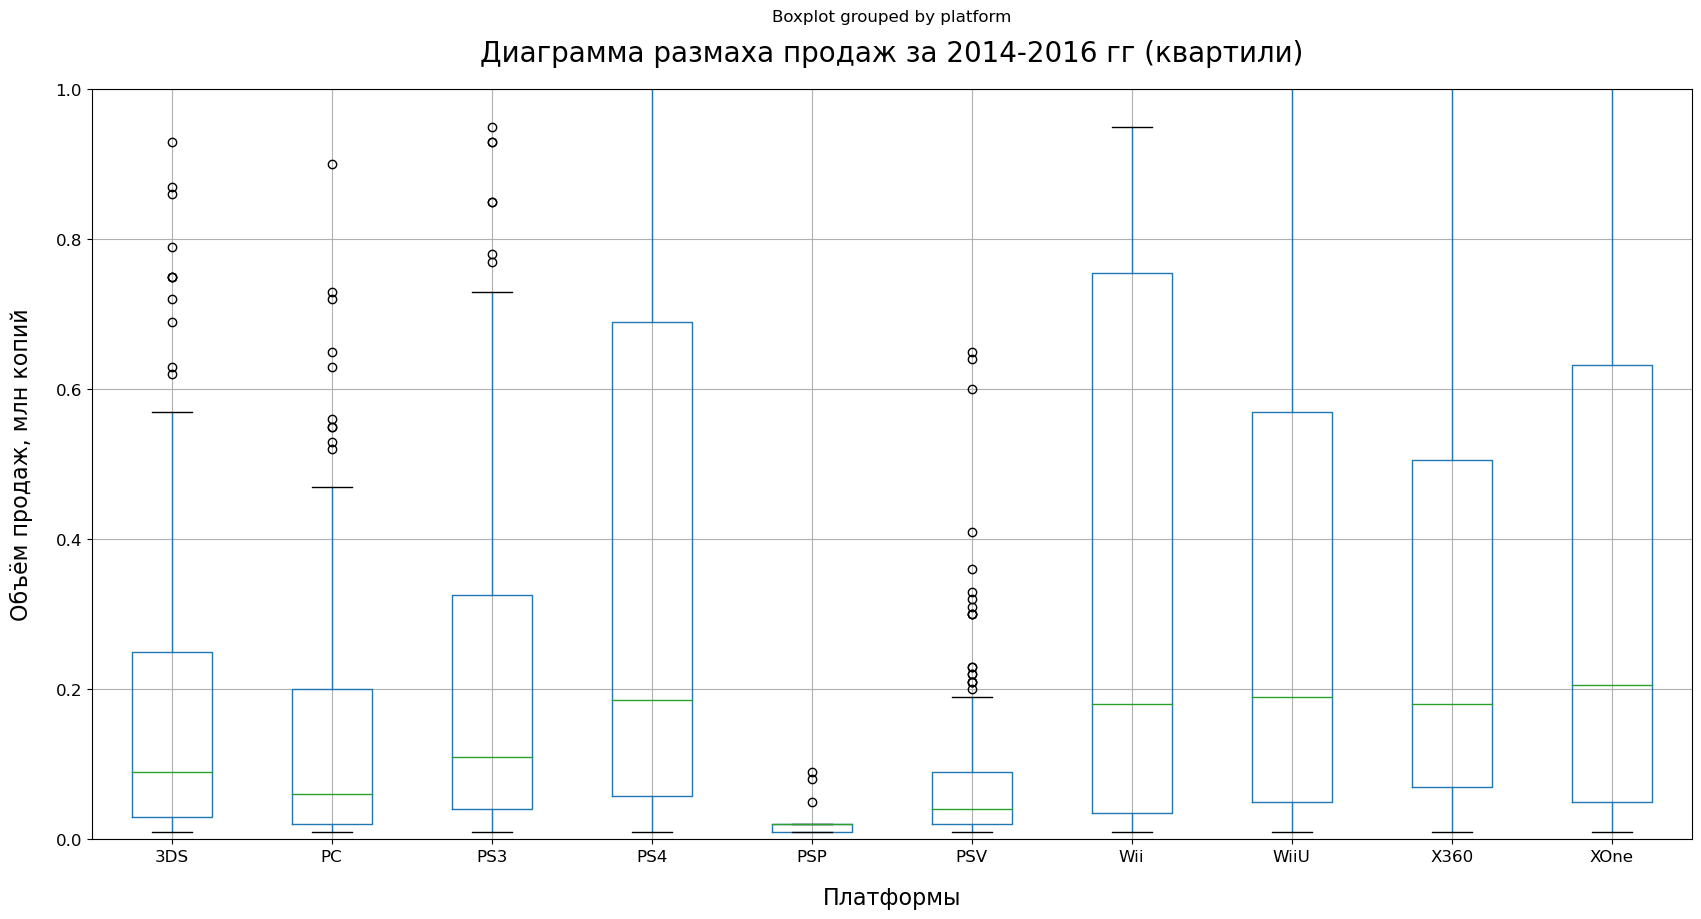

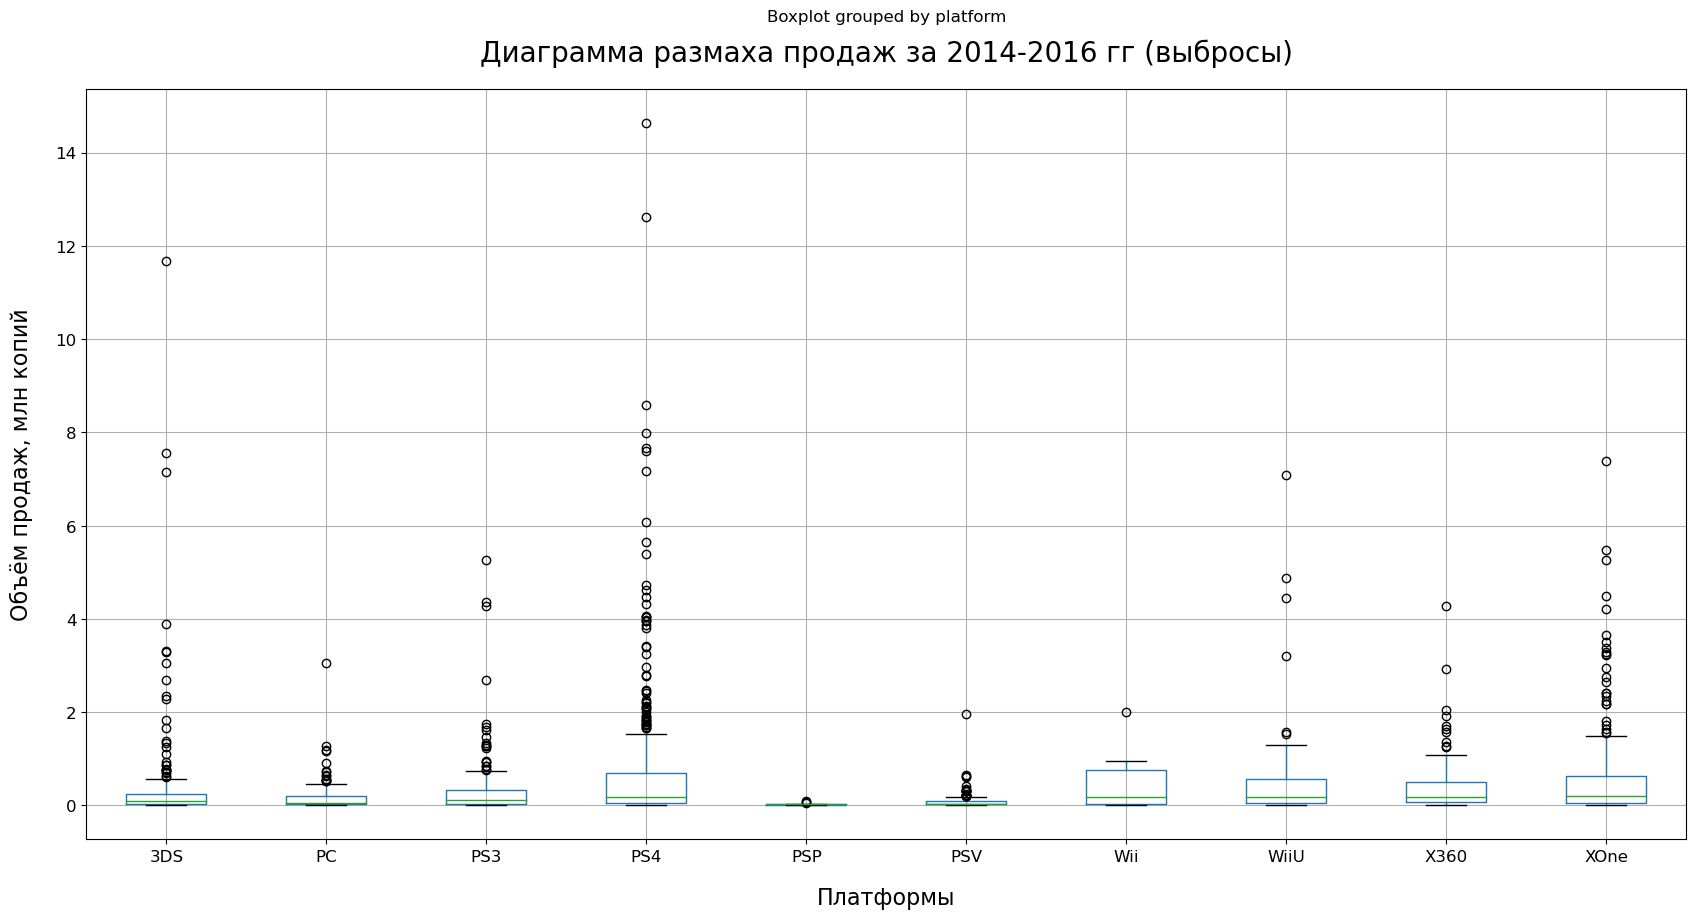

In [38]:
# строим диаграммы размаха продаж для платформ
actual_data.boxplot(
    column='total_sales',
    by='platform',
    figsize=(20, 10)
)
# настраиваем графики
plt.title('Диаграмма размаха продаж за 2014-2016 гг (квартили)', fontsize=20, pad=20)
plt.xlabel('Платформы', fontsize=16, labelpad=16)
plt.ylabel('Объём продаж, млн копий', fontsize=16, labelpad=16)
plt.tick_params(labelsize=12)
plt.ylim(0, 1)
plt.show()

# строим диаграммы размаха продаж для платформ
actual_data.boxplot(
    column='total_sales',
    by='platform',
    figsize=(20, 10)
)
# настраиваем графики
plt.title('Диаграмма размаха продаж за 2014-2016 гг (выбросы)', fontsize=20, pad=20)
plt.xlabel('Платформы', fontsize=16, labelpad=16)
plt.ylabel('Объём продаж, млн копий', fontsize=16, labelpad=16)
plt.tick_params(labelsize=12)
#plt.ylim(0, 1)
plt.show()

Все платформы имеют скошенное распределение объёма продаж, что говорит нам о том, что случаются продажи намного выше среднего значения (медианы). Из лидеров стоит отметить *Wii*, *PS4*, *XOne*, *WiiU*, *X360*. Мы не будем рассматривать *Wii*, потому что к $2014$ она окончательно устарела, а её суммарный объём продаж крайне незначительный. Примечательно, что *X360*, несмотря на свой возраст продолжает быть актуальной платформой. 

Самые значительные выбросы (не характерные значения продаж) наблюдаются у *PS4* и портативной *3DS*. Выбросы случались довольно часто. Здесь стоит отметить и *XOne*: пусть платформа и не лидирует по не характерным объёмам продаж, он они случались также часто.   

## 3.3. Влияние отзывов

Посмотрим, как влияют на продажи отзывы пользователей и критиков внутри одной популярной платформы. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

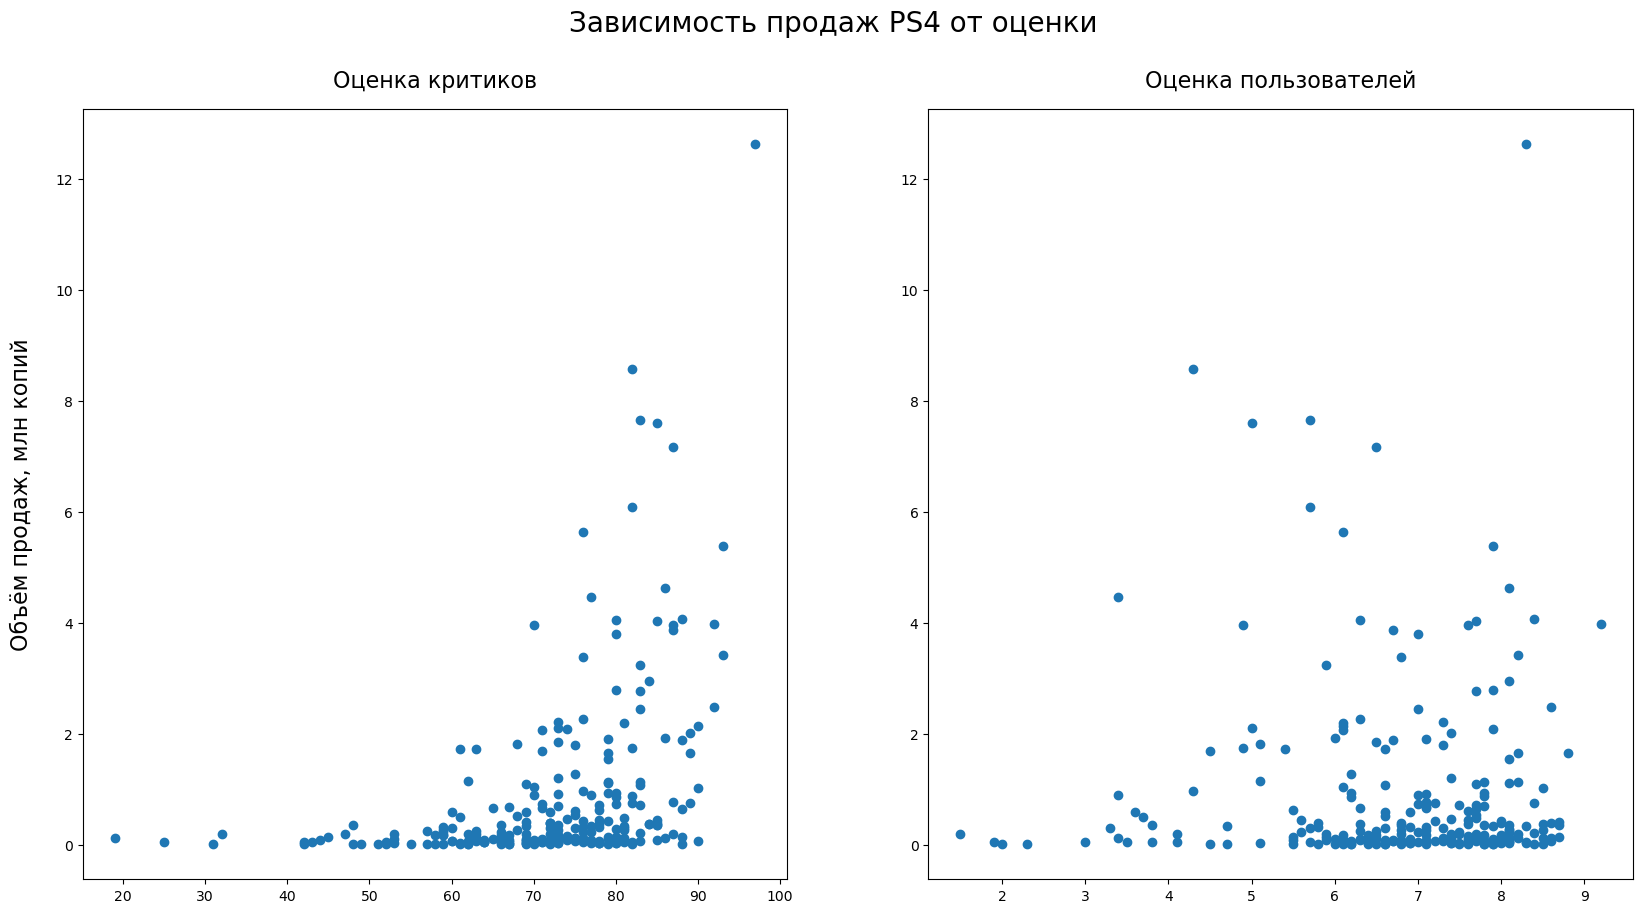

In [39]:
# создаём и настраиваем общую фигуру
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Зависимость продаж PS4 от оценки', fontsize=20)

# создаём и натсраиваем график зависимости
# продаж от оценки критиков
ax_critic_score = fig.add_subplot(1, 2, 1)
ax_critic_score.set_title('Оценка критиков', fontsize=16, pad=16)
ax_critic_score.set_ylabel('Объём продаж, млн копий', fontsize=16, labelpad = 16)
ax_critic_score.scatter(
    x=actual_data.query('platform == "PS4"')['critic_score'].astype(float), 
    y=actual_data.query('platform == "PS4"')['total_sales']
)

# создаём и натсраиваем график зависимости
# продаж от оценки пользователей
ax_user_score = fig.add_subplot(1, 2, 2)
ax_user_score.set_title('Оценка пользователей', fontsize=16, pad=16)
ax_user_score.scatter(
    x=actual_data.query('platform == "PS4"')['user_score'], 
    y=actual_data.query('platform == "PS4"')['total_sales']
)

# выводим только графики
plt.show()

На диаграмме *оценки критиков* начиная с оценки $60$ и выше появляются объёмы свыше 2 млн копий. И чем выше *оценка критиков*, тем вероятнее встретить более «масштабные» объёмы. Но они слишком разбросаны, чтобы говорить о явной прямой зависимости. 

На диаграмме *оценки пользователей* наблюдается схожая картина: с ростом *оценки* появляются объёмы побольше. Но есть одно существенное отличие: при низких оценках можно встретить выбросы в объёме продаж. Разбросанная диаграмма и выбросы при низких оценках существенно снижают ожидаемую зависимость.

На обеих диаграммах основное количество наблюдений в нашем актуальном периоде находится выше средней оценки и не превышает одного миллиона копий. Если рассматривать только этот участок, то зависимость *продаж* от *оценок* не прослеживается. Проверим наши наблюдения корреляцией Пирсона. 

In [40]:
# считаем корреляцию Пирсона для оценок и продаж
actual_data.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


Цифры говорят нам о слабой зависимости *продаж* и *оценки критиков* и нулевой зависимости между *продажами* и *оценкой пользователей*. В целом это подтверждается реальностью. Компьютерные издания в соверменном мире имеют некоторую привилегию перед обычными пользователями: они могут получить предрелизную копию игры, изучить продукт и оценить его публично, тем самым подогревая интерес пользователей или наоборот охлаждая. Для одних пользователей это может быть экспертным мнением, для других — поводом для дисскуссий (игровая компания в любом случае получит профит, либо деньги, либо рекламу). Влияние экспертного мнения на оценку пользователей подтверждается корреляцией между *оценкой критиков* и *оценкой пользователей*. Пусть и слабой, но присутствующей.

Посмотрим как зависят продажи от отзывов на других популярных платофрмах за актуальный период. Vы выберем такие платформы *XOne*, *3DS*, *WiiU*, исходя из полученны результатов исследования.

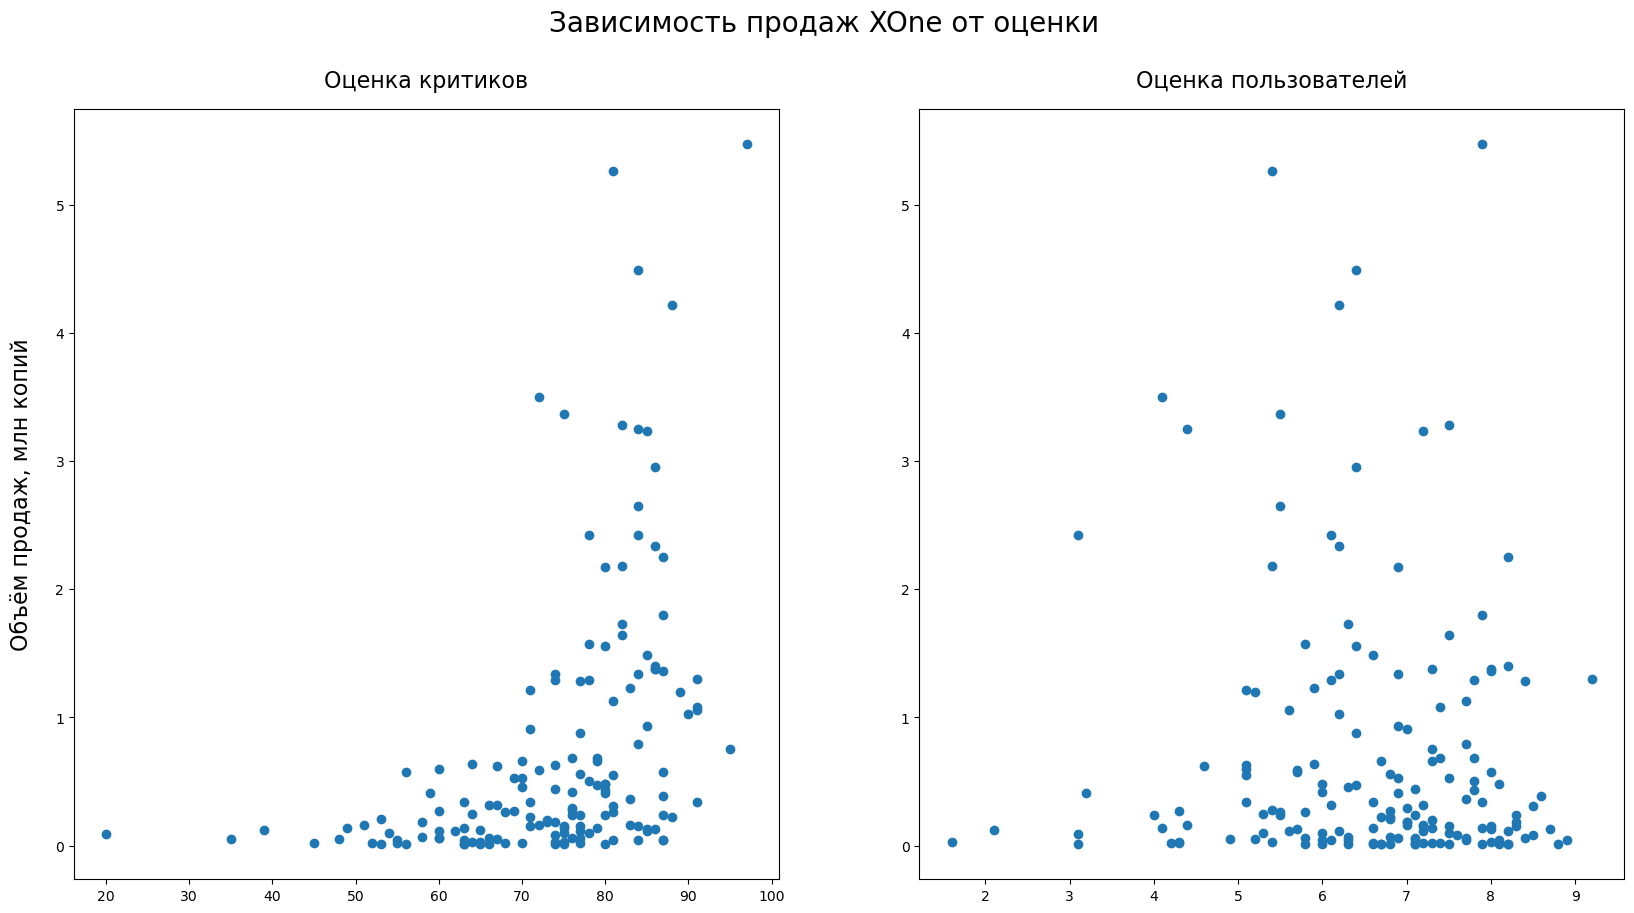

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


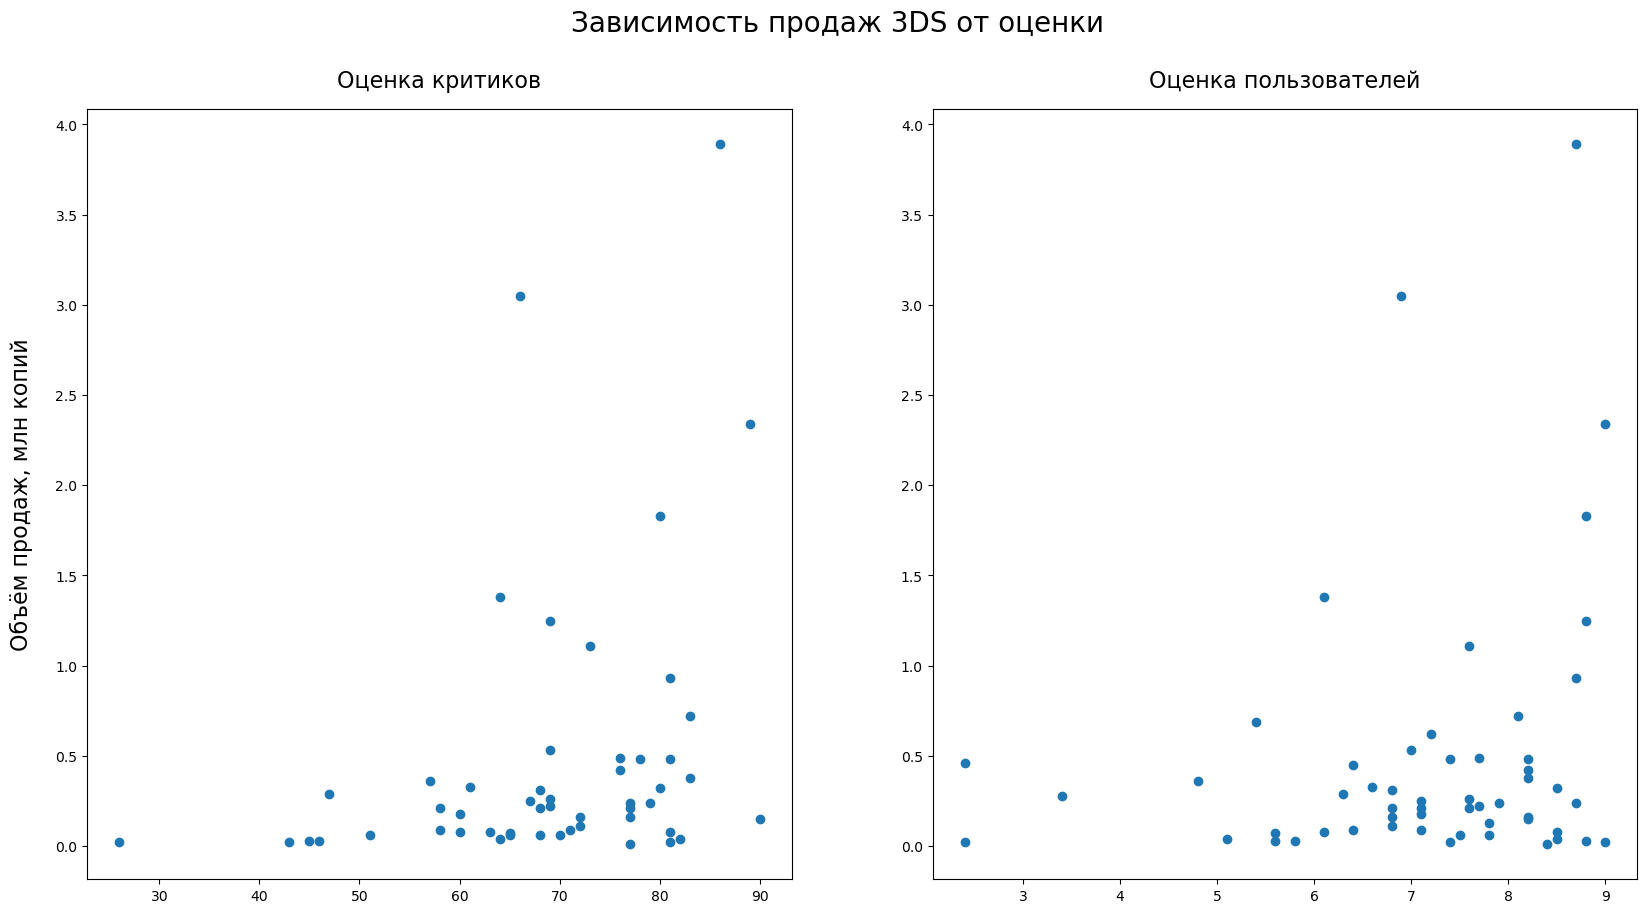

,critic_score,user_score,total_sales
critic_score,1.000000,0.862485,0.314117
user_score,0.862485,1.000000,0.215193
total_sales,0.314117,0.215193,1.000000


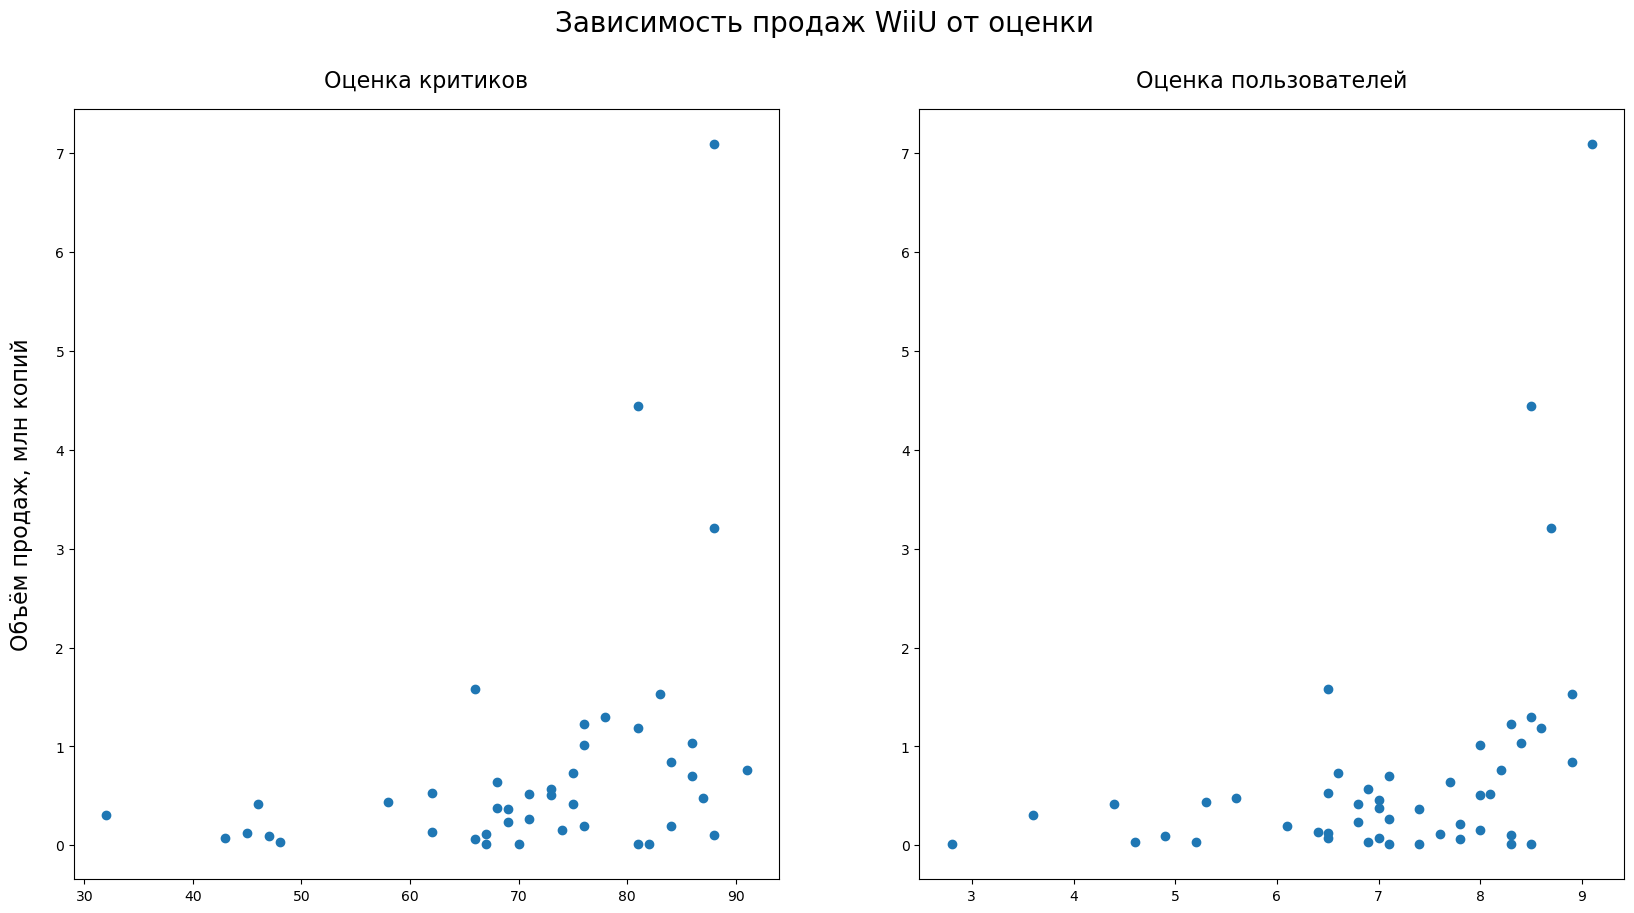

,critic_score,user_score,total_sales
critic_score,1.000000,0.763536,0.370201
user_score,0.763536,1.000000,0.407926
total_sales,0.370201,0.407926,1.000000


In [41]:
for platform in ['XOne', '3DS', 'WiiU']:
    # создаём и настраиваем общую фигуру
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(f'Зависимость продаж {platform} от оценки', fontsize=20)

    # создаём и натсраиваем график зависимости
    # продаж от оценки критиков
    ax_critic_score = fig.add_subplot(1, 2, 1)
    ax_critic_score.set_title('Оценка критиков', fontsize=16, pad=16)
    ax_critic_score.set_ylabel('Объём продаж, млн копий', fontsize=16, labelpad = 16)
    ax_critic_score.scatter(
        x=actual_data.loc[actual_data['platform'] == platform, 'critic_score'].astype(float), 
        y=actual_data.loc[actual_data['platform'] == platform, 'total_sales']
    )

    # создаём и натсраиваем график зависимости
    # продаж от оценки пользователей
    ax_user_score = fig.add_subplot(1, 2, 2)
    ax_user_score.set_title('Оценка пользователей', fontsize=16, pad=16)
    ax_user_score.scatter(
        x=actual_data.loc[actual_data['platform'] == platform, 'user_score'].astype(float), 
        y=actual_data.loc[actual_data['platform'] == platform, 'total_sales']
    )

    # выводим только графики
    plt.show()
    # считаем корреляцию Пирсона для оценок и продаж
    display(actual_data.loc[actual_data['platform'] == platform][['critic_score', 'user_score', 'total_sales']].corr())

На разных платформах корреляция Пирсона немного изменяется, но не координально. Зависимость продаж от отзывов то исчезает, то проявляет себя слабо. **Оценки критиков на этих платформах совсем слабо влияют на продажи, как и в случае с *PS4***, диапазон корреляций лежит в пределах от $0.3$ до $0.4$ значений. Что же до зависимости продаж от оценки пользователей, то она слабо прослеживается только у *WiiU*.

Стоит отметить, что **критики довольно сильно влияют на оценку пользователей рассматриваемых портативных платформ *WiiU* и *3DS***. Вероятно, здесь пользователи часто покупают портативную приставку под воздействием «экспертного» мнения.

Подводя итог, **можно сказать, что *объём продаж* напрямую не зависит от мнения критиков, но *оценка критиков* играет свою роль во всей системе игровой индустрии.** Она может выступать неким акселератором продаж.

## 3.4. Жанры

Посмортим на распределение игр по жанрам. Попробуем найти самые прибыльные жанры, а также жанры с высокими и низкими продажами. 

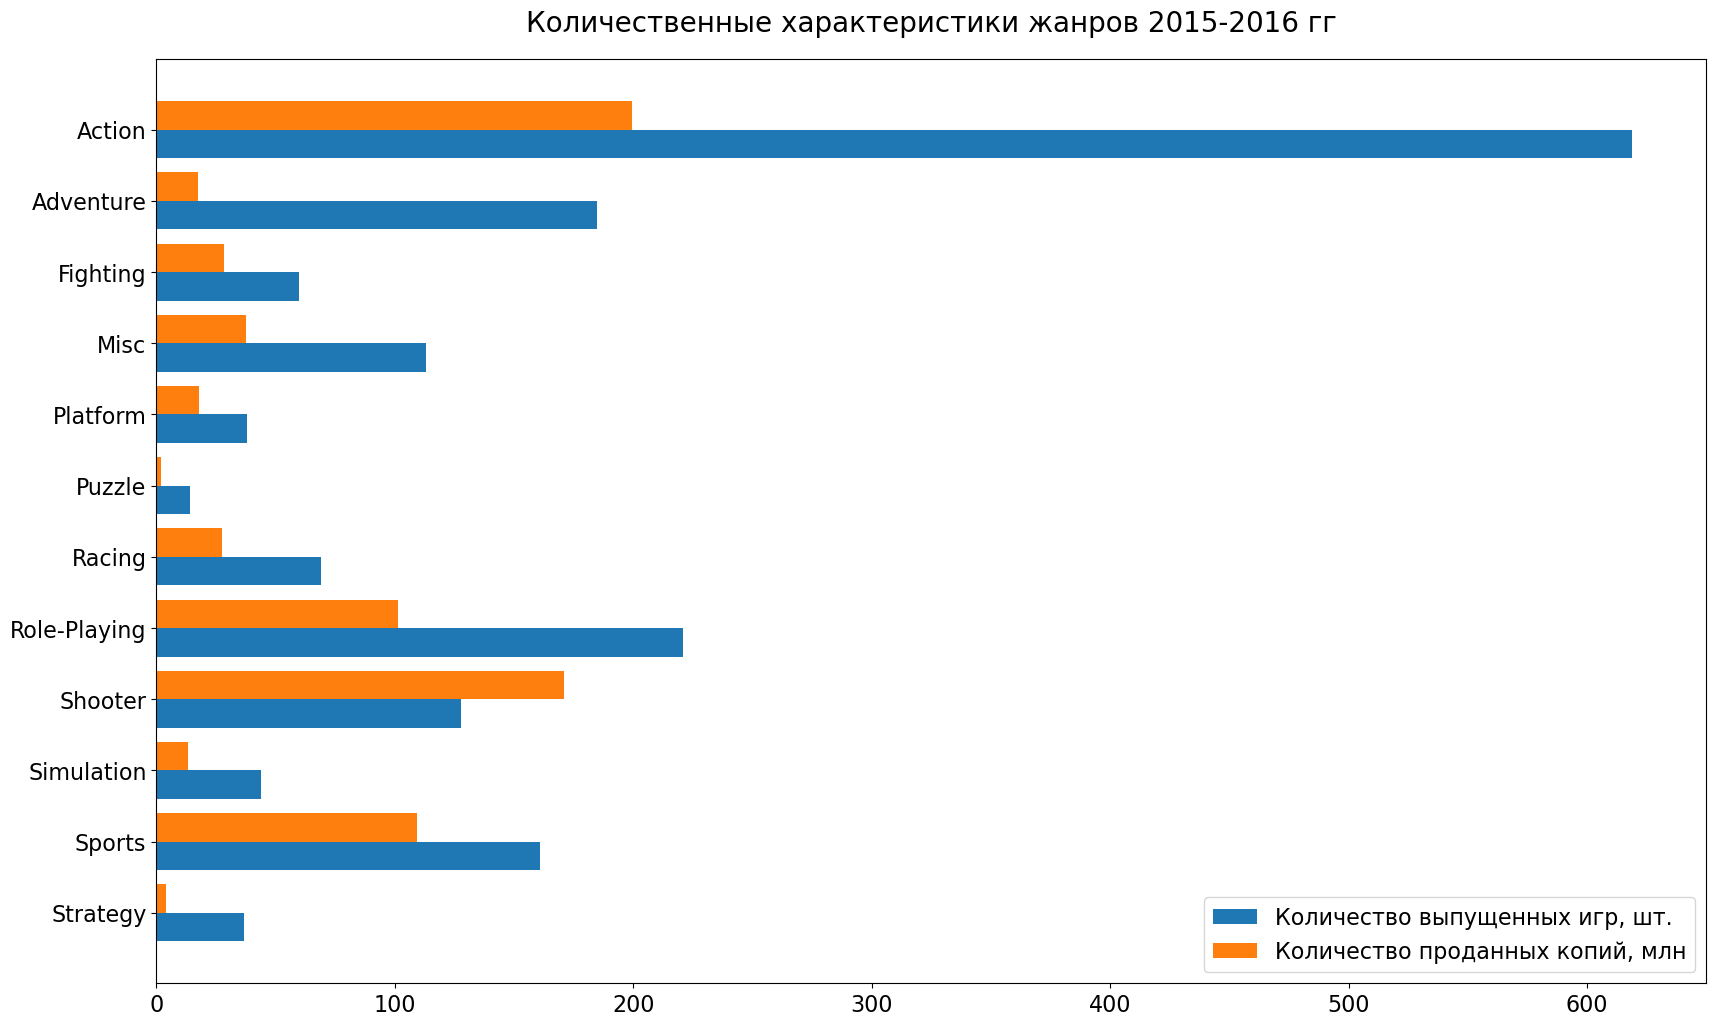

In [42]:
# формируем данные по количеству выпущенных игр
# и объёму продаж, группированные по жанрам
genre_pivot = (
    # создаём сводную таблицу
    actual_data.pivot_table(
        index='genre', 
        values=['name', 'total_sales'], 
        aggfunc=({'name': 'count', 'total_sales': 'sum'})
    )
)

# создаём контейнер для графиков
fig = plt.figure(figsize=(20, 12))
# создаём график
ax = fig.add_subplot()
# инвертируем ось y, чтобы жанры находились в алфавитном порядке
ax.invert_yaxis()

# строим горизонтальную столбчатую диаграмму по количеству игр
ax.barh(
    y=genre_pivot.index, 
    width=genre_pivot.name, 
    height=0.4, 
    align='edge', 
    label=('Количество выпущенных игр, шт.')
)
# строим горизонтальную столбчатую диаграмму по объёму продаж
ax.barh(
    y=genre_pivot.index, 
    width=genre_pivot.total_sales, 
    height=(-0.4),  
    align='edge', 
    label=('Количество проданных копий, млн')
)

# настраиваем метки и заголовки
ax.set_title('Количественные характеристики жанров 2015-2016 гг', fontsize=20, pad=20)
ax.legend(fontsize=16)
plt.tick_params(labelsize=16)

# выводим только график
plt.show()

**Самый популярный *жанр* игр, выпускаемый в игровой индустрии это *Action***, некая аналогия боевика в кинематографе. Это жанр игр в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. Жанр представлен во множестве разновидностей от *файтингов*, *шутеров* и *платформеров*, которые считаются наиболее важными для жанра, до так называемой *Multiplayer Online Battle Arena* и некоторых стратегий в реальном времени, которые возможно отнести к жанру экшен. **Меньше выпускали *ролевики*, *приключения* и *спорт*. Совсем мало было выпущенно игр в жанре *паззлы***. Очевидно, что в реальности их интереснее скалдывать, чем в цифровом виде.

**Самыми прибыльными являются *шутеры* и *боевики*, менее прибыльными являются *ролевики* и *спорт*. Остальные жанры имеют низкий уровень продаж, по сравнению с лидерами.** Важно учитывать один момент: **несмотря на то, что *боевики* находятся среди лидеров по *объёму продаж*, их выпускается очень много.** Это говорит нам о том, что не все *боевики* покупаются «на ура». Например, отношение проданных *шутеров* к числу выпущенных за актуальный период будет намного выше. Рассчитаем отношение проданных жанров к количеству выпущенных этих жанров за актуальный период и построим круговую диаграмму, чтобы оценить результаты.   

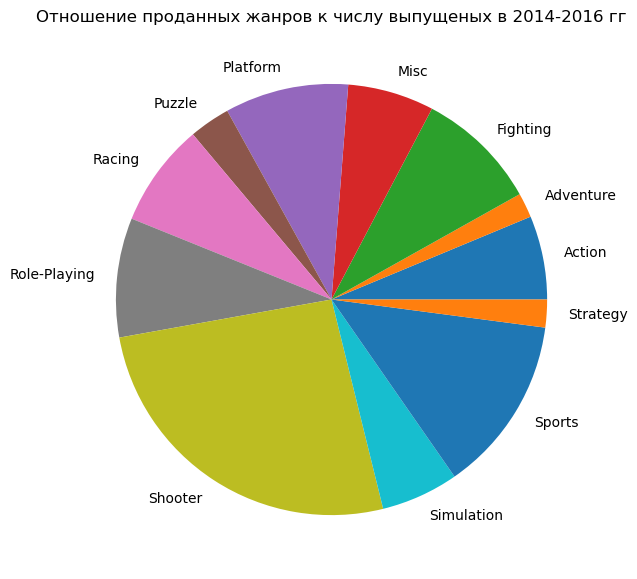

In [43]:
# добавляем рассчитанное отношение проданных копий жанра к количеству выпущенных
genre_pivot['profit_share'] = genre_pivot['total_sales'] / genre_pivot['name']
# строим круговую диаграмму
genre_pivot.profit_share.plot(
    kind='pie', 
    figsize=(7, 7)
)
# настраиваем график
plt.title('Отношение проданных жанров к числу выпущеных в 2014-2016 гг')
plt.axis('off')
plt.show()

Учитывая отношение проданных копий жанра к выпущеному количеству игр этого жанра, можно сказать, что **самым прибыльным является *шутер*. На втором месте — *спорт*.** Меньше всего прибыли принесли *паззлы*, *приключения* и *стратегии*.

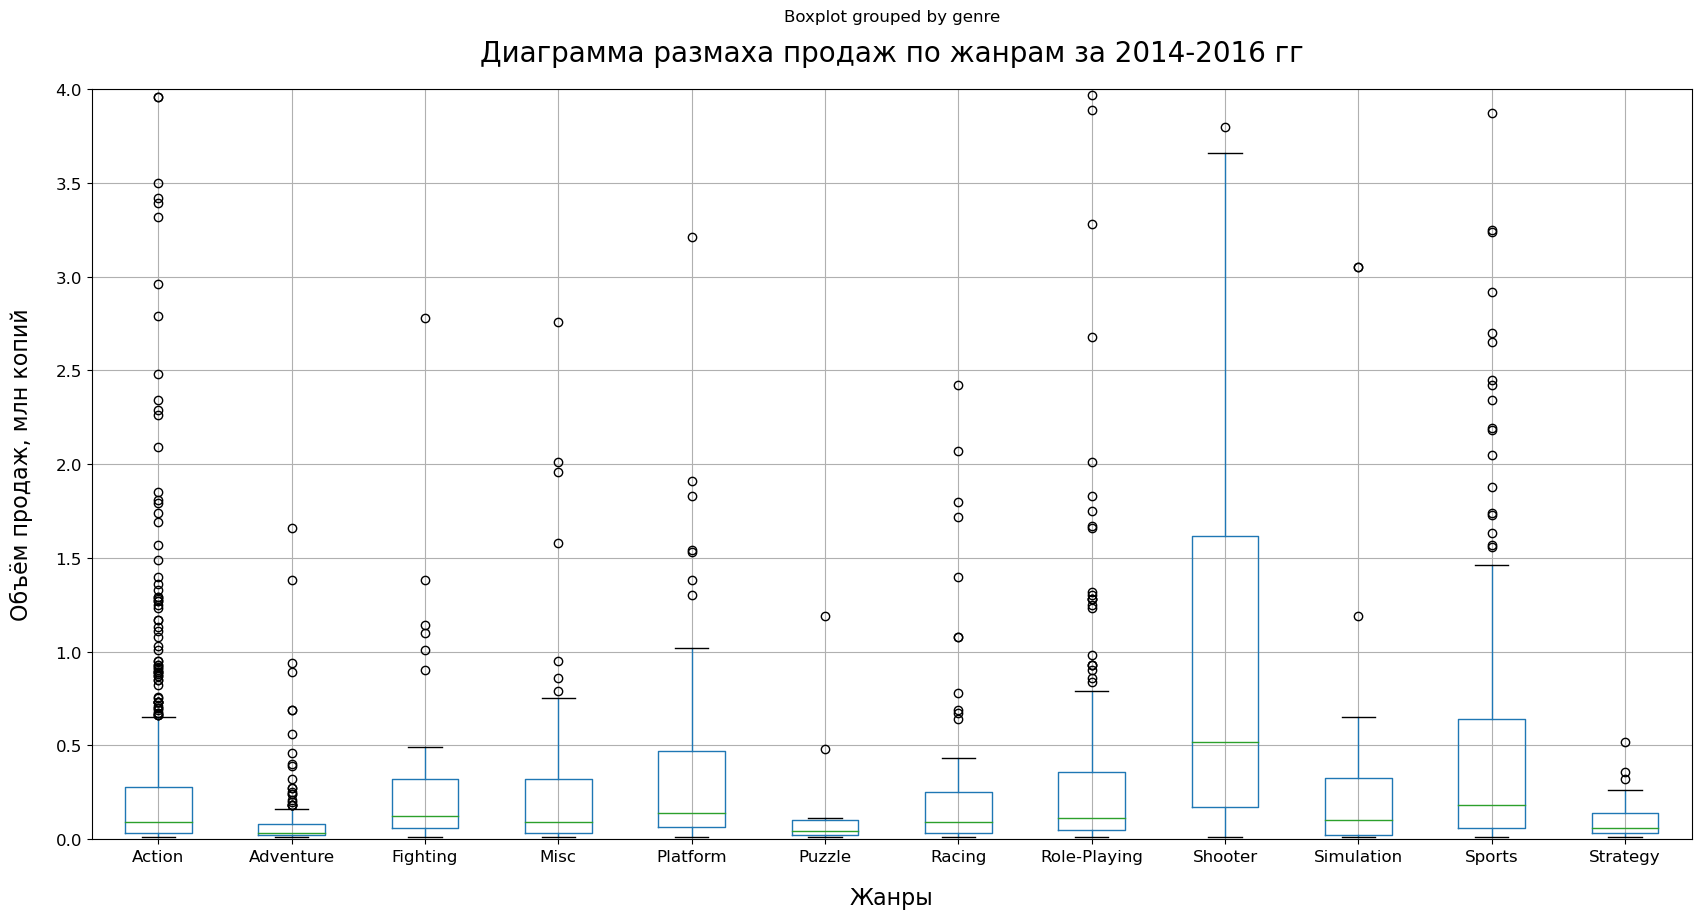

In [44]:
# строим диаграммы размаха продаж для жанров
actual_data.boxplot(
    column='total_sales',
    by='genre',
    figsize=(20, 10)
)
# настраиваем графики
plt.title('Диаграмма размаха продаж по жанрам за 2014-2016 гг', fontsize=20, pad=20)
plt.xlabel('Жанры', fontsize=16, labelpad=16)
plt.ylabel('Объём продаж, млн копий', fontsize=16, labelpad=16)
plt.tick_params(labelsize=12)
plt.ylim(0, 4)
plt.show()

**Диаграммы размаха продаж по жанрам за актуальный период подтверждают прибыльность *шутеров***. Их средний (медианный) объём продаж превышает третий квартиль значений всех платформ. Исключением является *спорт*. Он заметно выше приносит прибыли по сравнению с остальным жанрами. Вспомним игры *FIFA*, *NHL*, *NFL* и *NBA*, которые являются основным генератором продаж.    

## Вывод

На этапе исследовательского анализа мы выяснили следующее:
* Самое большое количество игр было выпущено в $2008-2009$ годах.
* Самые популярные платформы существововали $10-11$ лет, когда конкуренции практически не было. Начиная с $2004$ года выпуск новых платформ ускорился. Теперь каждые $5$ лет появляются новые платформы и исчезают старые. Новое поколение платформ по продажам вырывается вперёд, а предыдущее — падает. Учитывая тот факт, что на дворе $2016$ год, следующее поколение следует ожидать в $2018-2019$ году.
* Для прогноза рекламной кампании за актуальный период был взят $2014-2016$ года. За этот период налюдается больше $1500$ выпущенных игр, текущее поколение платформ ещё не сменится $2-3$ года. Мы сможем проследить за свежими платформами, не затронув старые тренды.
* Лидерами продаж являются *PS4* и *XONe*. В динамике все платформы падают, из-за чего *XOne* сравнялся с двумя другими платформами — *3DS* и *WiiU*. *3DS* за $2015$ год показал незначительный рост, поэтому и оказался в четвёрке лидеров.
* В разрезе глобальных продаж выгодными платформами являются *PS4*, *XOne* и *WiiU*. Их объёмы продаж могут значительно превышать медианные значения. Также стоит отметить что *X360* остаётся актуальной платформой, несмотря на свой возраст. Игры на неё продолжают покупаться.
* Продажи на прямую не зависят от мнения критиков, но слабовыраженная связь есть. Мнение критиков в целом может влиять на игровую индустрию через пользователей, выступать в качестве акселератора продаж, призывая пользователей покупать. Такую зависимость мы обнаружили у портативных платформ *3DS* и *WiiU*. Влияние оценок пользователей на продажы отсутствует, за исключением платформы *WiiU*, тут присутчтвует слабовыраженная связь. 
* Самый выпускаемый жанр игр это Action. Среднюю позицию занимают спортивные игры, приключения и ролевики. Меньше выпускались файтинги, гонки, симуляторы и стратегии. Меньше всего было выпущено игр в жанре Puzzle.
* Если учесть отношение проданных копий жанра к выпущеному количеству игр этого жанра, то самым прибыльным является шутер. Его среднее значение объёма продаж значительно превышает верхние квартильные значения других платформ, а разброс значенимй говорит о том, что прибыли может быть гораздо больше среднего. 

# 4. Портрет пользователя разных регионов

Определим для каждого пользователя каждого региона самые популярные платформы и самые популярные жанры. А также проверим, влияет ли рейтинг *ESRB* на продажи в отдельном регионе.

## 4.1 Популярные платформы по регионам

In [45]:
# создаём сводную таблицу популярности платформ по регионам
top_platform_regoins = actual_data.pivot_table(
    index='platform', 
    values=['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum'
)
# создаём топ-5 платформ для разных регионов
top_platform_na = top_platform_regoins.na_sales.sort_values(ascending=False).head(5)
top_platform_eu = top_platform_regoins.eu_sales.sort_values(ascending=False).head(5)
top_platform_jp = top_platform_regoins.jp_sales.sort_values(ascending=False).head(5)

# добавим в топы оставшиеся доли платформ
top_platform_na.loc['Other'] = top_platform_regoins.query('na_sales not in @top_platform_na')['na_sales'].sum().round(2)
top_platform_eu.loc['Other'] = top_platform_regoins.query('eu_sales not in @top_platform_eu')['eu_sales'].sum().round(2)
top_platform_jp.loc['Other'] = top_platform_regoins.query('jp_sales not in @top_platform_jp')['jp_sales'].sum().round(2)

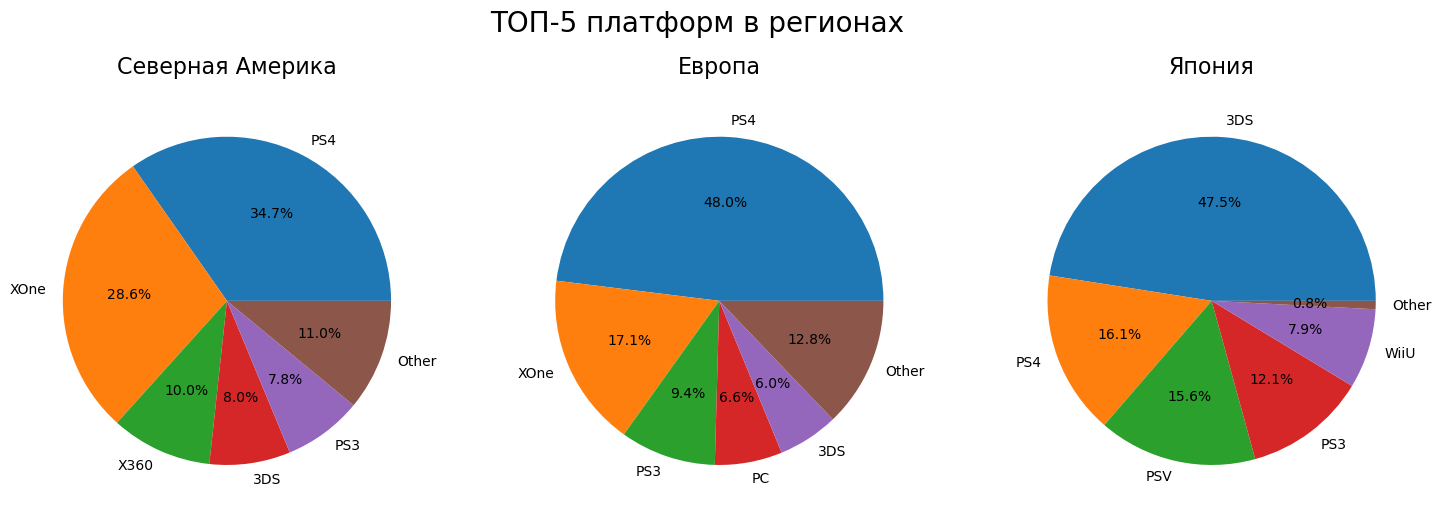

In [46]:
# создаём и настраиваем общую фигуру
fig = plt.figure(figsize=(18, 6))
fig.suptitle('ТОП-5 платформ в регионах', fontsize=20)

# создаём и настраиваем диаграмму Северной Америки
ax_na = fig.add_subplot(1, 3, 1)
ax_na.set_title('Северная Америка', fontsize=16, pad=16)
ax_na.pie(
    top_platform_na,
    labels= top_platform_na.index,
    autopct='%1.1f%%'
)

# создаём и настраиваем диаграмму Европы
ax_eu = fig.add_subplot(1, 3, 2)
ax_eu.set_title('Европа', fontsize=16, pad=16)
ax_eu.pie(
    top_platform_eu,
    labels= top_platform_eu.index,
    autopct='%1.1f%%'
)

# создаём и настраиваем диаграмму Японии
ax_jp = fig.add_subplot(1, 3, 3)
ax_jp.set_title('Япония', fontsize=16, pad=16)
ax_jp.pie(
    top_platform_jp,
    labels= top_platform_jp.index,
    autopct='%1.1f%%'
)

# выводим только графики
plt.show()

**Самые популярные платформы Европы и Североной Америки это *PS4* и *XOne***, причём в Европе больше любят Sony. В Северной Америке Sony имеет серьёзного конкурента — *XOne* не отстаёт в продажах. В общей картине на долю этих платформ приходится половина рынка Европы и Северной Америки, $65\%$ и $62\%$ соответственно. Остальная доля распределятеся практически равномерно среди отсальных платформ из ТОП-5.   

**На японском рынке лидирует портативная платформа *3DS* от *Nintendo*.** Она занимает почти $50\%$ рынка. Другая половина рынка занята в основном продуктами Sony (*PS4*, *PSV* и *PS3* имеют по $12-16$ процентов). 

## 4.2. Популярные жанры по регионам

In [47]:
# создаём сводную таблицу популярности жанров по регионам
top_genre_regoins = actual_data.pivot_table(
    index='genre', 
    values=['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum'
)

# создаём топы жанров для разных регионов
top_genre_na = top_genre_regoins.na_sales.sort_values(ascending=False).head(5)
top_genre_eu = top_genre_regoins.eu_sales.sort_values(ascending=False).head(5)
top_genre_jp = top_genre_regoins.jp_sales.sort_values(ascending=False).head(5)

# добавим в топы оставшиеся доли платформ
top_genre_na.loc['Other'] = top_genre_regoins.query('na_sales not in @top_genre_na')['na_sales'].sum().round(2)
top_genre_eu.loc['Other'] = top_genre_regoins.query('eu_sales not in @top_genre_eu')['eu_sales'].sum().round(2)
top_genre_jp.loc['Other'] = top_genre_regoins.query('jp_sales not in @top_genre_jp')['jp_sales'].sum().round(2)

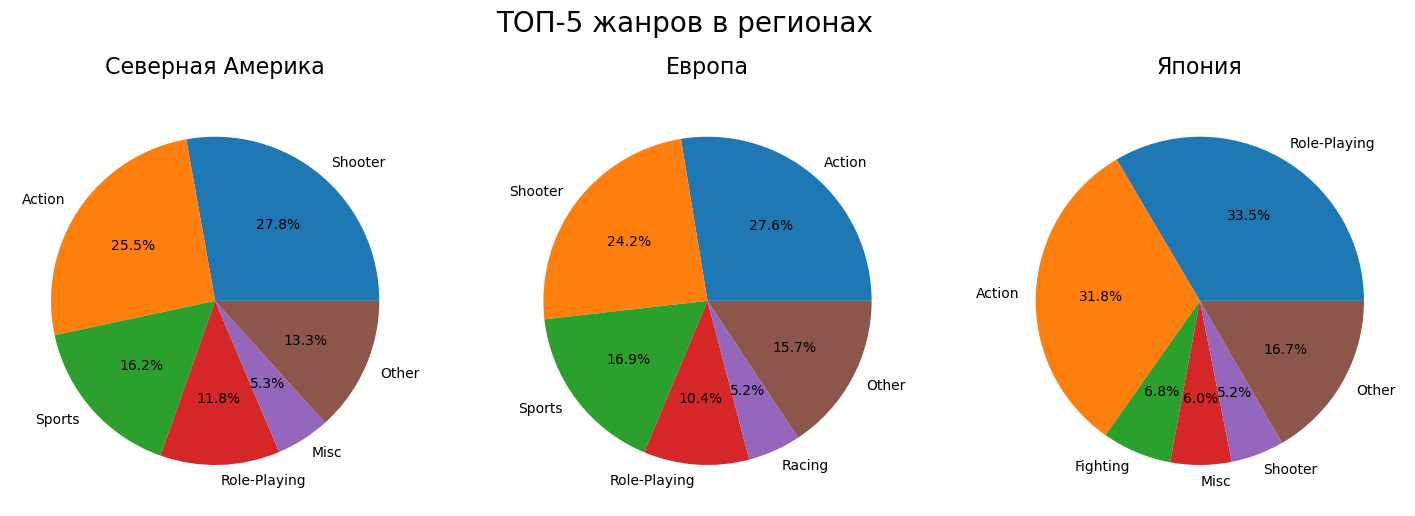

In [48]:
# создаём и настраиваем общую фигуру
fig = plt.figure(figsize=(18, 6))
fig.suptitle('ТОП-5 жанров в регионах', fontsize=20)

# создаём и настраиваем диаграмму Северной Америки
ax_na = fig.add_subplot(1, 3, 1)
ax_na.set_title('Северная Америка', fontsize=16, pad=16)
ax_na.pie(
    top_genre_na,
    labels= top_genre_na.index,
    autopct='%1.1f%%'
)

# создаём и настраиваем диаграмму Европы
ax_eu = fig.add_subplot(1, 3, 2)
ax_eu.set_title('Европа', fontsize=16, pad=16)
ax_eu.pie(
    top_genre_eu,
    labels= top_genre_eu.index,
    autopct='%1.1f%%'
)

# создаём и настраиваем диаграмму Японии
ax_jp = fig.add_subplot(1, 3, 3)
ax_jp.set_title('Япония', fontsize=16, pad=16)
ax_jp.pie(
    top_genre_jp,
    labels= top_genre_jp.index,
    autopct='%1.1f%%'
)

# выводим только графики
plt.show()

Самые популярные жанры Северной Америки и Европы практически полностью совпадают, различие только на пятом месте лидеров. ***Шутеры*, *боевики*, *спорт* и *ролевики* – вот во что любят играть в Европе и Северной Америке.** В Японии больше всего любят играть в *боевики* и *ролевики*, *шутеры* у них не котируются. Это можно объяснить спецификой японской индустрии видео игр: **все мировые хиты, которые произвели японскии компании, являют либо *боевиками*, либо *ролевиками*.**

## 4.3. Влияние возрастного рейтинга на продажи в регионах

In [49]:
# создаём сводную таблицу возрастных рейтингов по регионам
rating_count_regoins = actual_data.pivot_table(
    index='rating', 
    values=['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum'
)

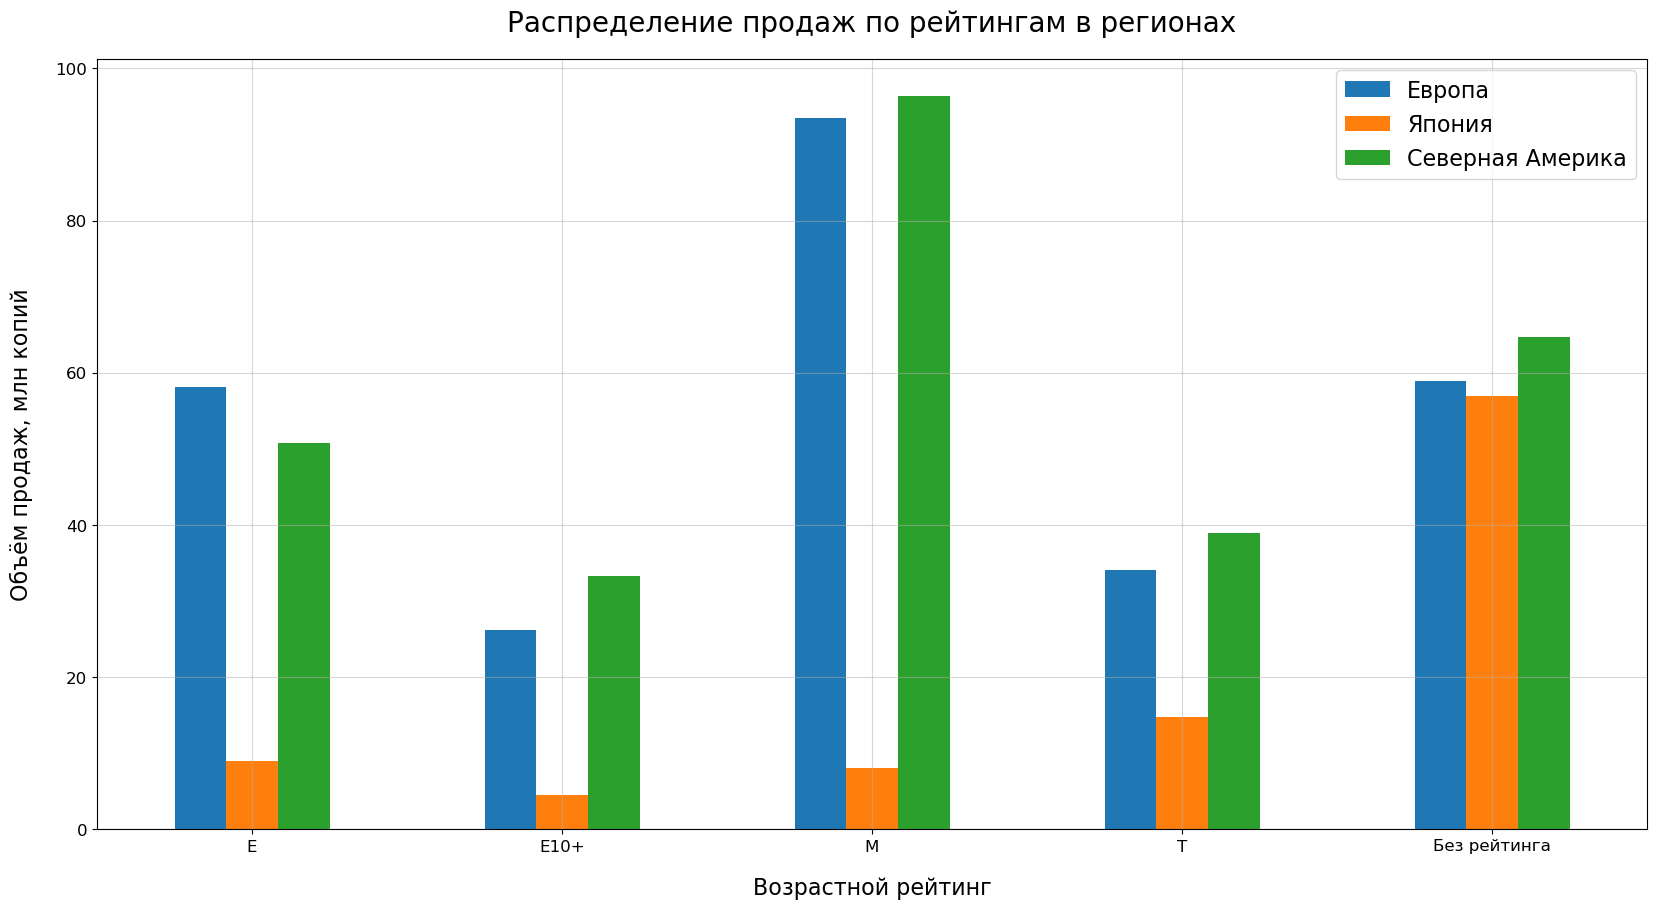

In [50]:
# создаём столбчатую диаграмму
rating_count_regoins.plot(
    kind='bar',
    figsize=(20, 10),
    rot=False,
)
# настраиваем график
plt.title('Распределение продаж по рейтингам в регионах', fontsize=20, pad=20)
plt.ylabel('Объём продаж, млн копий', fontsize=16, labelpad=16)
plt.xlabel('Возрастной рейтинг', fontsize=16, labelpad=16)
plt.tick_params(labelsize=12)
plt.legend(labels=['Европа', 'Япония', 'Северная Америка'], fontsize=16)
plt.grid(True, alpha=0.5)
plt.show()

Чаще всего в Северной Америке и Европе покупают игры с категорией *M* — для лиц, старше $17$ лет. Эти игры содержат в себе всё самое зрелищное: секс, кровь и насилие в той или иной степени. Поэтому к таким играм и вызван повышенный интерес совершеннолетних пользователей. 

Стоит отметить, что в распределение за актуальный период не попали игры для самых маленьких и игры 18+, где секса ещё больше, а насилие зрелищнее. В случае самых маленьких, современные игровые компании, вероятно, переориентировалась на более прибыльном сегменте пользователей, оставив детску категорию игр. А вот отсутствие самой взрослой категории *AO* можно объяснить следующим образом. Такая категория в современной игровой индустрии является некоторым клеймром: из-за отношения регулятора к крайне «взрослому» контенту многие компании урезают свои игры, чтобы получить более мягкий рейтинг. Иначе не избежать общественного порицания со стороны различных организаций. Этого пытаются избежать и розничные торговцы, которые отказываются реализовывать игры с таким рейтингом. В своё время многие игровые студии пошли на изменение контента своих игр.

Не исключено, что есть компании, которые отказались что-то менять в своём продукте, и попросту остались без рейтинга. Всё таки это не обязательная процедура. Смелый шаг. Учитывая, что мы наблюдаем в распределении группу *без рейтинга* как вторую по популярности, этот шаг был вознаграждён. 

Игры без рейтинга оказались популярны во всех трёх крупных регионах. Если для Северной Америки это могут быть игры с неудавшимся рейтингом *AO*, то для Европы и Японии это не имеет значения, потому что рейтинг *ESRB* не распространяется на иных издателей. Иначе говоря, это могут быть игры, которые не издавались на территории США и Канады.

Третья популярная категория игр это *E*, дял всех. Эти игры не содержат какого-либо насилия и/или жестокости, и полностью покрывают все возрастные группы.

Возвращаясь к вопросу о влиянии *рейтинга* на продажи, можно сказать следующее. При условии, что доступ игр происходит строго по возрасту, **в европейской и северо-американской части регоионов со взрослением пользователя увеличивается и спрос на соответствующую категорию игр.** Не исключено, что и **самая «зрелищная» категория игр, с рейтингом *M* или *AO* является самой востребованной среди игроков**. В Японии же такая закономерность не прослеживается, возможно, из-за совершенно другой культуры.  

## Вывод

Мы провели исследования по регионам и составили портрет пользователя в каждом регионе:

**Северо-американский пользователь**:
* играет на таких платформах как *PS4* и *XOne*. Их доля рынка составляет $28.6\%$ и $37.4\%$. Это больше половины рынка.
* играет в *Shooting*, *Action*, что составляет $52\%$ рынка. Остальная часть распределена между *Sports*, *Role-Playing*. Меньше всего играют в *Misc* и другие жанры, доля которых составляет меньше $5\%$.
* чаще всего выбирает игры с возрастным рейтингом *M*, для лиц старше 17 лет. *Безрейтинговые* игры также популярны у этого пользователя. На долю этих рейтингов приходится $47$ и $37$ миллионов проданных копий игр. Средние позиции занимают игры *для в всех* и *для подростков*, $26$ и $23$ миллиона копий соответственно. На *детские* игры, *10+*, приходится всего $18$ миллионов.

**Европейский пользователь**:
* предпочитает играть на платформе *PS4*, почти $50\%$ всего европейского рынка. *XOne* пользуется меньшей популярностью, всего $17\%$.
* играет в теже же жанры, что и северо-американский пользователь. Распределение доле такое же, за исключением самого непопулярного  жанра из ТОП-5 — *Racing* занимает $5\%$.
* как и северо-американский пользователь, предпочитает игры с возрастным рейтингом *M*, для лиц старше 17 лет. Также популярны и *безрейтинговые* игры. На долю этих рейтингов приходится чуть меньше игр, чем у северо-американских пользователей. В целом европейский пользователь полностью поторяет северо-американского пользователя, просто  с чуть меньше  долей продаж.

**Японский пользователь**
* больше всего любит портативную платформу *3DS*, на долю которого приходится почти $50\%$ рынка. Другая половина рынка занята в основном продуктами Sony: PS4, PSV и PS3 имеют по  $12\%−16\%$ на каждую.
* любимые жанры игр это *Action* и *Role-playing*, $31.8\%$ и $33.5\%$ соответственно. Это юольше половины рынка. В отличие от западного пользователя, японский не любит играть в *Shooting*.
* координально отличается от западных пользователей в выборе рейтинга. Основная доля игр приходится на *безрейтинговые*, немного уступая европейцам и северо-американцам — $35$ миллионов проданных копий игр. Доля остальных рейтингов незначительная, в среднем $5$ миллионов, больше игр *для подростков*, меньше — *для детей*. Игры с рейтингом *M*, *для взрослых*, не пользуются популярностью у японского пользователя, в отличие от западных пользователей. Возможно по причине культурных различий.  

# 5. Проверка гипотез

Существует несколько предположений:
1. Пользователи таких платформ как *XBox One* и *PC* в среднем дают одинаковую оценку играм.
2. Пользватели в среднем оценивают жанры *Action* и *Sports* по-разному.

В первом случае мы предполагаем, что пользователи обеих платформ имеют одинаковую лояльность. Во втором — пользователи по-разному лояльны к разным жанрам. Сформулируем нулевую и альтернативную гипотезы для каждого случая и проверим их с помощью статистических тестов.

## 5.1. Первая гипотеза

$H_0$: Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые.

$H_1$: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Для проверки гипотезы мы будем сравнивать средние значения оценок двух независимых совокупностей (пользователи *Xbox* и пользователи *PC*). Скорее всего, эти выборки разного размера, и мы ничего не знаем об их дисперсии. Это стоит учесть при проведении тестов. 

Мы сможем опровергнуть нулевую гипотезу только в том случае, если вероятность получить одинаковые значения будет слишком мала. Критерием того, какую вероятность считать слишком маленькой является уровень статистической значимости. От его выбора зависит, как далеко может оказаться одна средняя оценка от другой при нулевой гипотезе. Установим конвенциальное значение уровня статистической значимости в $5\%$.   

In [51]:
# объявляем переменную, которой присвоим результат теста
result = st.ttest_ind(
    # выбираем первую совокупность
    actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].dropna(),
    # выбираем вторую совокупность
    actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].dropna(),
    # устанавливаем значение неравной дисперсии
    equal_var=False
)

# задаём уровень значимости
alpha = .05

# выводим вероятностное значение
print('-----------------------------------------')
print(f'p-value = {result.pvalue}')

# проверяем условие опровержения гипотезы
if result.pvalue < alpha:
    print('-----------------------------------------')
    print('Отвергаем нулевую гипотезу')
    print('-----------------------------------------')
else:
    print('-----------------------------------------')
    print('Не получилось отвергнуть нулевую гипотезу')
    print('-----------------------------------------')

-----------------------------------------
p-value = 0.11601398086668835
-----------------------------------------
Не получилось отвергнуть нулевую гипотезу
-----------------------------------------


Вероятность случайно получить одинаковую оценку на двух платформах достаточно велика. У нас есть основания полагать, что cредние пользовательские рейтинги платформ *XOne* и *PC* одинаковые, а значит, пользователи этих платформ одинаково лояльны.

## 5.2. Вторая гипотеза

$H_0$: Средние пользовательские рейтинги жанров *Action* и *Sports* одинаковые.

$H_1$: Средние пользовательские рейтинги жанров *Action* и *Sports* разные.

Для проверки этой гипотезы мы воспользуемся тем же способом, что и в предыдущем тесте: сравниваем средние оценки двух совокупностей. Скорее всего, они разыне по размеру, о их дисперсии нам ничего не известно. Уровень стаистической значимости — $5\%$.

In [52]:
# объявляем переменную, которой присвоим результат теста
result = st.ttest_ind(
    # выбираем первую совокупность
    actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].dropna(),
    # выбираем вторую совокупность
    actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].dropna(),
    # устанавливаем значение неравной дисперсии
    equal_var=False
)

# задаём уровень значимости
alpha = .05

# выводим вероятностное значение
print('-----------------------------------------')
print(f'p-value = {result.pvalue}')

# проверяем условие опровержения гипотезы
if result.pvalue < alpha:
    print('-----------------------------------------')
    print('Отвергаем нулевую гипотезу')
    print('-----------------------------------------')
else:
    print('-----------------------------------------')
    print('Не получилось отвергнуть нулевую гипотезу')
    print('-----------------------------------------')

-----------------------------------------
p-value = 1.1825550382644557e-14
-----------------------------------------
Отвергаем нулевую гипотезу
-----------------------------------------


Вероятность случайно получить одинаковую оценку для двух жанров крайне мала. У нас есть основания полагать, что  средние пользовательские рейтинги жанров *Action* и *Sports* разные, а значит, пользователи по-разному лояльны к разным жанрам.

В качестве иллюстарции непротиворечивости наших гипотез выведем средние пользовательские оценки платформ *XOne* и *PC*, а также средние пользовательские оценки жанров *Action* и *Sports*.

In [53]:
# считаем средние пользовательские оценки исследуемых платформ
actual_data.query('platform == ["XOne", "PC"]').groupby('platform')['user_score'].mean()

platform
PC      6.298361
XOne    6.594545
Name: user_score, dtype: float64

In [54]:
# считаем средние пользовательские оценки исследуемых жанров
actual_data.query('genre == ["Action", "Sports"]').groupby('genre')['user_score'].mean()

genre
Action    6.760606
Sports    5.225197
Name: user_score, dtype: float64

Действительно, оценки пользователей платформ *XOne* и *PC* не сильно различаются, разница составляет примерно $0.3$ оценки. А вот оценки пользователей жанров *Action* и *Sports* различаются примерно в $1.5$ оценки.

## Вывод

Мы провели проверку двух гипотез, в результате чего одну из них мы опровергнули. Мы не смогли отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и отвергнули гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Результат проверки этих гипотез говорит нам о том, что пользователи платформ *Xbox One* и *PC* вероятно одинаково лояльны, а также, вероятно что пользователи по разному лояльны к разным жанрам.  

# 6. Общий вывод

Мы представили, что работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. На дворе декабрь $2016$ год, и мы планируем провести рекламную кампанию на $2017$-й.

Наша задача — выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В нашем распоряжении оказались исторические данные из открытых источников: данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*).

Мы провели первичный обзор данных. Файл загрузился без ошибок. Данные имели табличную форму, где каждая строка это одна игра, а столбцы это параметры, которые описывали данную игру. Всего наблюдалось $16715$ разных игр, у которых были *имя, жанр, выпускаемая платформа, год выпуска, возрастной рейтинг, оценки критиков и пользователей, объём продаж разных регионов*. Наблюдаемые игры выпускались с $1980$ по $2016$ год, на $31$-й разной платформе, в $12$-ти разных жанрах.   

В данных были обнаружены следующие проблемы:

* столбцы имели имена, не соотвтетсвующие хорошему стилю написания;
* в некоторых параметрах было значительное количество пропусков;
* некоторые значения имели ошибочно определённый тип данных.

Прежде чем приступить к исследовательскому анализу, мы исправили многие обнаруженные проблемы в данных:

* Имена столбцов начинались с заглавных букв. Мы привели значения к строчному виду и перезаписали имена столбцов.
* *Год выпуска* был определён как вещественный тип и имел десятичную часть. Она не обозначала месяц, поэтому являлась избыточной. Мы откинули её, преобразовав тип *года выпуска* в целочисленный.
* *Оценка критиков* была определена как вещественный тип и имела десятичную часть, которая являлась избыточной. *Оценка критиков* подразумевала диапазон от $0$ до $100$, и в десятичной части не нуждалась. Мы откинули её, преобразовав тип *оценки критиков* в целочисленный.
 * *Оценка пользователей* была определена как тип данных «объект». Все численные значения были определены как строки из-за наличия строкового значения *«tbd»* в данных. Сначала требовалось обрабоать это значение, после чего мы изменили *оценку пользователей* на вещественный тип, так как она подразумевала диапазон оценок от $0$ до $10$ с десятичной частью.
* В *именах* и *жанрах* было всего два наблюдения со случайными пропусками. Их наличие никак не было связано со значениями в других параметрах. Пропуск в *имени* напрямую влиял на пропуск в *жанре*. Причина появления этих пропусков, скорее всего, техническая, например сбой при сборе данных. Так как количество этих пропуском было ничтожно мало, то мы их просто удалили.
 * В *годе выпуска* было $269$ пропусков. Их появление в столбце было полностью случайным, так как не было замечено каких-либо паттернов появления. Также эти пропуски не были связаны с пропусками в других параметрах. Возможная причина появления пропусков также техническая. Так как их количесто составляло $2\%$ от всех даннных, то мы удалили наблюдения с этими пропусками. Это не пвлияло на дальнейшее исследование.
* В *рейтинге* пропуски составляли $40\%$ от всех данных. Часть пропусков возникла из-за того, что рейтинговой системы не было до 1994 года. Подавляющая часть пропусков возникла по двум возможным причинам: игры, которые не издавались на территории Северной Америки, могли остаться без рейтинга; игры могли не направляться в ассоциацию. Чтобы в дальнейшем была возможность использовать эти наблюдения, мы заполнили пропуски значением-заглушкой *«Без рейтинга»*.
* В *оценках пользователей и критиков* пропуски составляли $40\%$ и $50\%$ соответственно. Была обнаружена сильная связь между *оценками* и *рейтингом*: подаваляющее большинство пропусков в этих параметрах совпадало. Это значит, что существуют такие наблюдения, в которых *оценки* отсутствуют по причине отсутствия *возрастного рейтинга*. Такое могло произойти, если онлайн платформа, на которой происходила оценка, не предоставляла игры без *рейтинга*. Также *оценка* могла отсутствовать для старых игр, которые не переиздавались, потому что в то время оценивание игр не происходило в таком масштабе как сейчас. Мы не стали заполнять пропуски в *оценках* средними или характерными значениями, потому что это было бы некорректно. *Оценка* игры в большей степени зависит от качества самой игры и удачной портированности, а не от *жанра* или *возрастного рейтинга*. По этой причине мы оставили пропуски в *оценках пользователей и критиков* неопределёнными.
* В *оценке пользователей* было обнаружено уникальное значение *«tbd»*, которое и стало причиной ошибки преобразования типа данных этого параметра. *«tbd»* значит, что оценка «подлежит обсуждению». То есть для этих игр на момент сбора данных *оценка* не была доступной или только собиралась объявляться. Мы заменили это значение на неопределённое.
* В *рейтинге* были обнаружены неявные дубликаты. Согласно справочной информации один из *рейтингов*, *E (для всех)*, изначально назывался как *K-A (для детей и взрослых)*. Поэтому в данных присутствовали наблюдения двух этих *рейтингов*. Мы заменили значение старого *рейтинга* на новый.
* После обработки всех обнаруженных проблем мы рассчитали и добавили в данные новый параметр — общая сумма продаж во всех регионах, `total_sales`.  

Чтобы выявить закономерности, определяющие успешность игры, мы провели исследовательский анализ. 

Сперва определили актуальный период для анализа. Посмотрели сколько игр суммарно выпускалось по годам. До $1994$ года игр было очень мало. Начиная с $1994$ года выпуск игр стал расти и достиг своего пика в $2008-2009$ годах. В эти годы выпускалось до $1400$ игр. Затем количество стало снижаться, и в $2016$ году закрепилось на отметке $500$.

Мы выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. Лидером по продажам за всё время оказалась *PS2*. Из распределения мы выяснили следующее:
* Самые популярные платформы существововали $10-11$ лет, когда конкуренции практически не было.
* Начиная с $2004$ года выпуск новых платформ ускорился. Теперь каждые $5$ лет появляются новые платформы и исчезают старые: новое поколение платформ по продажам вырывается вперёд, а предыдущее — падает.
* Учитывая тот факт, что на дворе $2016$ год, следующее поколение следует ожидать в $2018-2019$ году.
    
Исходя из полученой информации, для прогноза рекламной кампании за актуальный период решено было взять $2014-2016$ годы. Этот период достаточно хорошо осветит новые тренды, и при этом не затронет старые, отжившие.

Далее мы определили лидеров по продажам за актуальный период. Лидирующая позиция у *PS4*. На втором месте *XONe*. На третьем месте из акутальных платформ расположилась *3DS*. В динамике у всех платформ наблюдается падение продаж. К  2016 году лидеры сократились вдвое, позиции XOne, 3DS практически сравнялись. Это случилось потому что c  2015 года XOne стал больше терять в объемах продаж, а 3DS сменил направление тренда.

В разрезе глобальных продаж все платформы имеют скошенное распределение объёма продаж, что говорит нам о том, что случаются продажи намного выше среднего значения (медианы). Из лидеров стоит отметить *PS4*, *XOne*, *WiiU*, и *X360*. Примечательно, что *X360*, несмотря на свой возраст продолжает быть актуальной платформой.

Мы посмотрели, как влияют на продажи популярных платформ отзывы пользователей и критиков. Оказывается, что продажи на прямую не зависят от мнения критиков, но слабовыраженная связь между ними есть. Мнение критиков в целом может влиять на игровую индустрию через пользователей, выступать в качестве акселератора продаж, призывая пользователей покупать. Также оценка критиков может выступает в роли экспертного мнения. Цифры показывают, что между оценкой критиков и оценкой пользователей есть слабовыраженная связь, что даёт возможность нам предположить о влиянии критиков на общественное мнение. Такая взаимосвязь прослеживается на платформах *WiiU* и *3DS*.

Мы изучили общее распределение игр по жанрам. Самым популярным в игровой индустрии жанром является *Action*. За актуальный период его выпустили в три раза больше, чем следующая за ним тройка лидеров: *Adventure*, *Roke-playing* и *Sports*. Меньше выпускались *Fighting*, *Racing*, *Simulation* и *Strategy*. Совсем мало было выпущено игр в жанре *Puzzle*.

Самыми прибыльными являются *Shooting* и *Action*, менее прибыльными являются *Role-playing* и *Sports*. Остальные жанры имеют низкий уровень продаж, по сравнению с лидерами. Если учесть отношение проданных копий жанра к выпущеному количеству игр этого жанра, то самым прибыльным является *Shooting*. На втором месте *Sports*, а на третьем — *Role-playing*. Меньше всего прибыли приносят *Puzzle*, *Adventure* и *Strategy*. 

Диаграммы размаха подтверждают прибыльность шутеров. Их средний (медианный) объём продаж превышает третий квартиль значений всех платформ. Исключением является спорт. Он заметно выше приносит прибыли по сравнению с остальным жанрами. Вспомним игры FIFA, NHL, NFL и NBA, которые являются основным генератором продаж.

Мы провели исследования по регионам и составили портрет пользователя в каждом регионе:

**Северо-американский пользователь**:
* играет на таких платформах как *PS4* и *XOne*. Их доля рынка составляет $28.6\%$ и $37.4\%$. Это больше половины рынка.
* играет в *Shooting*, *Action*, что составляет $52\%$ рынка. Остальная часть распределена между *Sports*, *Role-Playing*. Меньше всего играют в *Misc* и другие жанры, доля которых составляет меньше $5\%$.
* чаще всего выбирает игры с возрастным рейтингом *M*, для лиц старше 17 лет. *Безрейтинговые* игры также популярны у этого пользователя. На долю этих рейтингов приходится $47$ и $37$ миллионов проданных копий игр. Средние позиции занимают игры *для в всех* и *для подростков*, $26$ и $23$ миллиона копий соответственно. На *детские* игры, *10+*, приходится всего $18$ миллионов.

**Европейский пользователь**:
* предпочитает играть на платформе *PS4*, почти $50\%$ всего европейского рынка. *XOne* пользуется меньшей популярностью, всего $17\%$.
* играет в теже же жанры, что и северо-американский пользователь. Распределение доле такое же, за исключением самого непопулярного  жанра из ТОП-5 — *Racing* занимает $5\%$.
* как и северо-американский пользователь, предпочитает игры с возрастным рейтингом *M*, для лиц старше 17 лет. Также популярны и *безрейтинговые* игры. На долю этих рейтингов приходится чуть меньше игр, чем у северо-американских пользователей. В целом европейский пользователь полностью поторяет северо-американского пользователя, просто  с чуть меньше  долей продаж.

**Японский пользователь**
* больше всего любит портативную платформу *3DS*, на долю которого приходится почти $50\%$ рынка. Другая половина рынка занята в основном продуктами Sony: PS4, PSV и PS3 имеют по  $12\%−16\%$ на каждую.
* любимые жанры игр это *Action* и *Role-playing*, $31.8\%$ и $33.5\%$ соответственно. Это юольше половины рынка. В отличие от западного пользователя, японский не любит играть в *Shooting*.
* координально отличается от западных пользователей в выборе рейтинга. Основная доля игр приходится на *безрейтинговые*, немного уступая европейцам и северо-американцам — $35$ миллионов проданных копий игр. Доля остальных рейтингов незначительная, в среднем $5$ миллионов, больше игр *для подростков*, меньше — *для детей*. Игры с рейтингом *M*, *для взрослых*, не пользуются популярностью у японского пользователя, в отличие от западных пользователей. Возможно по причине культурных различий.  

Также мы провели проверку двух гипотез. Предполагалось, что:
* средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;
* средние пользовательские рейтинги жанров *Action* и *Sports* разные.

Мы сформировали нулевые и альтернативные гипотезы для этих предположений:
* 𝐻0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
* 𝐻1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.
* 𝐻0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* 𝐻1: Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез мы сравнивали средние значения оценок двух независимых совокупностей (пользователи *Xbox* и пользователи *PC*, игры в жанре *Action* и игры в жанре *Sports*). При проведении тестов мы учли два момента: эти выборки скорее всего были разные по размеру, и нам не было известно про их дисперсию. .

После проведения тестов мы не смогли отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и отвергнули гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Результат проверки этих гипотез говорит нам о том, что пользователи платформ *Xbox One* и *PC* вероятно одинаково лояльны, а также, вероятно что пользователи по разному лояльны к разным жанрам. В кочестве иллючтрации непротиворечивости мы привели средние значения.

## Итог

Исходя из поставленной задачи, на основе проведённого исследования можно резюмировать следующее:
* Если рекламную кампанию проводить без учёта регионов, то:
    * мы должны ориентироваться на пользователей *PS4*;
    * мы должны рекламировать шутеры с возрастным рейтингом *M* и без рейтинга;
    * выбирая игры для рекламы стоит обращать на отзывы критиков.
* Если бюджетных средств хватит на рекламную кампанию по регионам, то
    * мы должгы ориентироваться на такие регионы как Северная Америка, Европа и Япония;
    * мы должны ориентироваться на следующие популярные платформы:
        * в Северной Америке на *PS4* и *XOne*;
        * в Европе на *PS4*;
        * в Японии на портативную *3DS*;
    * мы должны рекламировать следующие жанры:
        * в Северной Америке и Европе — шутеры и боевики с возрастным рейтингом *M* и без рейтинга;
        * В Японии — боевики и ролевики без возрастного рейтинга.
    * выбирая игры для рекламы стоит обращать на отзывы критиков.